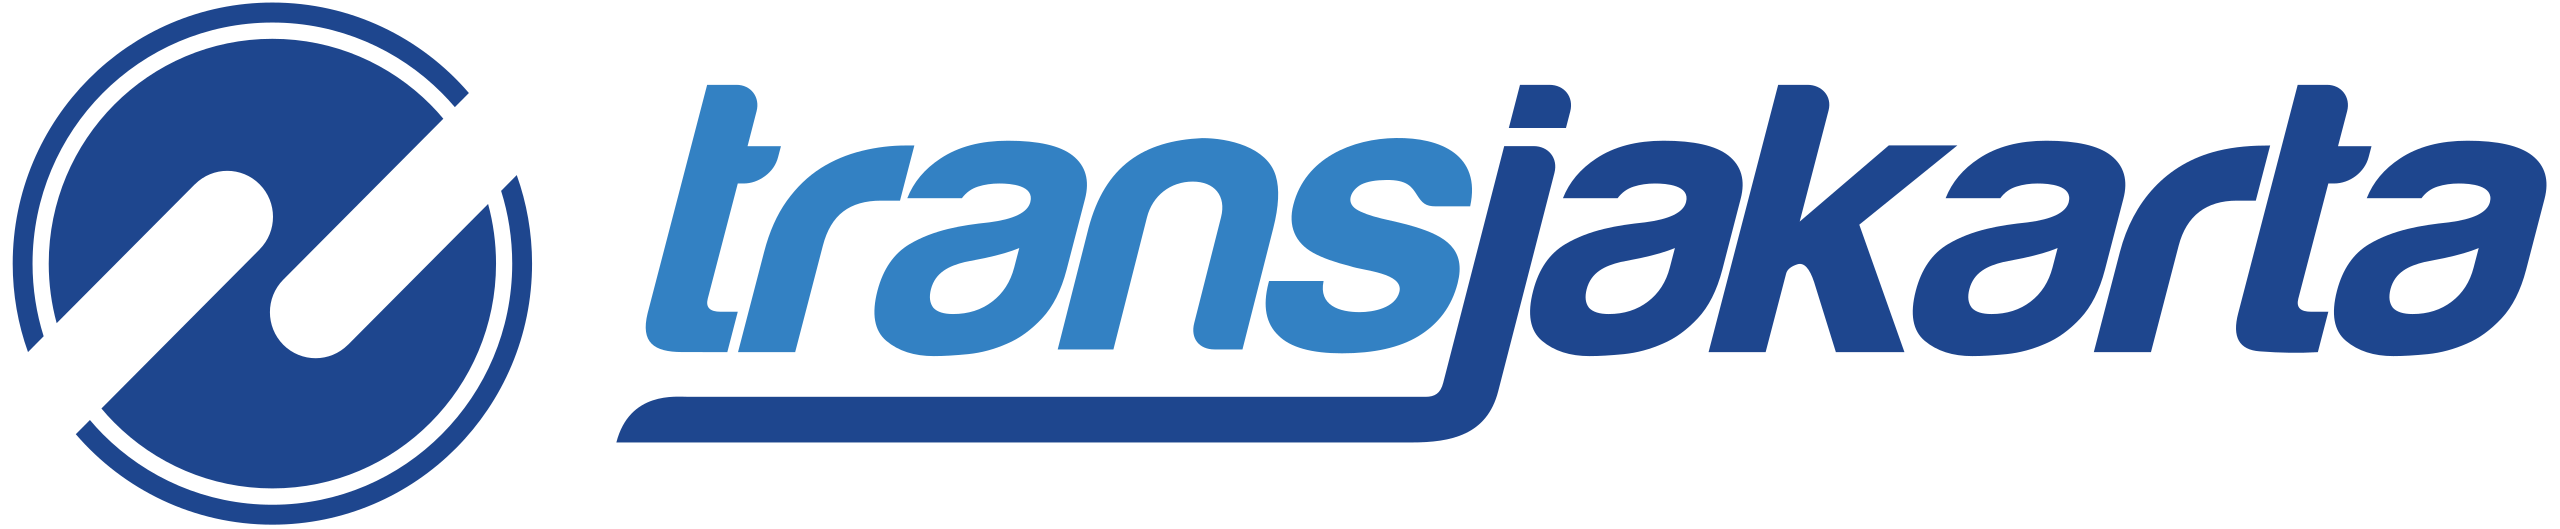

### **1. Latar Belakang**

Transjakarta, sebagai sistem transportasi *bus rapid transit* (BRT) pertama di Asia Tenggara, telah menjadi tulang punggung transportasi publik di Jakarta. Sejak mulai beroperasi pada tahun 2004, Transjakarta terus berupaya memberikan layanan yang lebih baik untuk memenuhi kebutuhan mobilitas warga kota. Dengan jumlah pengguna yang semakin meningkat, data transaksi yang dihasilkan dari sistem tiket elektronik memberikan peluang untuk menganalisis pola perjalanan, perilaku pengguna, dan efisiensi operasional.

#### **1.1 Permasalahan yang Dihadapi Perusahaan**
Transjakarta menghadapi berbagai tantangan, seperti pengelolaan rute, operasional, dan pelanyanan penumpang. Berikut adalah permasalahan yang dihadapi oleh Transjakarta:
1. Ketidakseimbangan jumlah penumpang, terutama saat jam sibuk pada rute tertentu yang dapat menyebabkan antrian panjang atau *overloading* di beberapa rute.
2. Keterlambatan operasional akibat kondisi lalu lintas atau hambatan lain yang menyebabkan ketidakpastian jadwal bus.
3. Perbedaan volume penumpang antara halte yang ramai dan halte yang kurang dimanfaatkan.


Sumber:
- https://www.scribd.com/document/400543371/Makalah-Transjakarta-Home-Group-1
- https://www.scribd.com/document/419964127/MAKALAH-TRANSJAKARTA-docx 

#### **1.2 Rumusan Masalah**

1. Bagaimana Transjakarta dapat mengoptimalkan frekuensi dan kapasitas bus berdasarkan jumlah penumpang di setiap rute dan waktu tertentu?
2. Apa saja rute perjalanan yang mengalami keterlambatan?
3. Bagaimana memetakan pola penggunaan halte untuk meningkatkan fasilitas di halte dengan volume penumpang tinggi dan mengevaluasi halte yang kurang dimanfaatkan?
4. Bagaimana demografi penumpang (usia, gender, dan segmen bank pengguna kartu) memengaruhi pola perjalanan?
5. Apa langkah-langkah strategis yang dapat diambil untuk mengurangi pemanfaatan yang kurang di rute tertentu dan meningkatkan efisiensi operasional secara keseluruhan?

#### **1.3 Tujuan Analisa**
Analisis ini bertujuan untuk memberikan wawasan berdasarkan data yang dapat mendukung pengambilan keputusan strategis untuk meningkatkan efisiensi operasional, pelayanan penumpang, dan optimalisasi pemanfaatan halte.

### **2. Import & Load Data**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import kstest
import folium 
from folium.plugins import HeatMap
from collections import Counter

In [2]:
transjkt = pd.read_csv('Transjakarta.csv')
transjkt.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


1.	`transID`: Id transaksi unik untuk setiap transaksi
2.	`payCardID`:  Pengenal utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket masuk dan keluar.
3.	`payCardBank`: Nama bank penerbit kartu pelanggan
4.	`payCardName`:  Nama pelanggan yang tercantum dalam kartu.
5.	`payCardSex`:  Jenis kelamin pelanggan yang tertanam dalam kartu
6.	`payCardBirthDate`: Tahun kelahiran pelanggan
7.	`corridorID`: ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
8.	`corridorName`: Nama Koridor / Nama Rute berisi Start dan Finish untuk setiap rute.
9.	`direction`: 0 untuk Keberangkatan, 1 untuk Pulang. Arah rute.
10.	`tapInStops`: Tap In (pintu masuk) ID Halte untuk mengidentifikasi nama halte
11.	`tapInStopsName`: Tap In (pintu masuk) Nama Halte tempat pelanggan melakukan tap in.
12.	`tapInStopsLat`:  Garis Lintang dari Tap In Stops
13.	`tapInStopsLon`: Bujur dari  Tap In Stops
14.	`stopStartSeq`: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.
15.	`tapInTime`: Waktu tap in. Tanggal dan waktu
16.	`tapOutStops`: Tap Out (Keluar) ID Pemberhentian untuk mengidentifikasi nama pemberhentian
17.	`tapOutStopsName`: Tap out (keluar) nama halte tempat pelanggan melakukan tap out.
18.	`tapOutStopsLat`: Garis Lintang dari Tap Out Stops
19.	`tapOutStopsLon`: Bujur dari Tap Out Stops
20.	`stopEndSeq`: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.
21.	`tapOutTime`: Waktu tap out. Tanggal dan waktu
22.	`payAmount`: Jumlah yang harus dibayar pelanggan. Ada yang gratis. Beberapa tidak.


### **3. Data Understanding**

#### **3.1 Statistika Deskriptif**

In [3]:
transjkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [4]:
transjkt.shape

(37900, 22)

In [5]:
transjkt.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [6]:
transjkt.describe(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


Secara keseluruhan berdasarkan data original dapat diketahui:
- Mayoritas kartu berasal dari bank "DKI".
- Nama kartu paling sering muncul adalah Fathonah Saefullah dengan frekuensi 80.
- Mayoritas pengguna kartu berjenis kelamin perempuan.
- Koridor "Cibubur - Balai Kota" yang paling sering digunakan.
- Titik pemberangkatan paling umum adalah Penjaringan.
- Titik pemberhentian paling umum adalah BKN.


In [7]:
transjkt.nunique()

transID             37900
payCardID            2000
payCardBank             6
payCardName          1993
payCardSex              2
payCardBirthDate       67
corridorID            221
corridorName          216
direction               2
tapInStops           2570
tapInStopsName       2602
tapInStopsLat        2587
tapInStopsLon        2458
stopStartSeq           67
tapInTime           37079
tapOutStops          2230
tapOutStopsName      2248
tapOutStopsLat       2237
tapOutStopsLon       2139
stopEndSeq             74
tapOutTime          35908
payAmount               3
dtype: int64

#### **3.2 Missing Value**

In [8]:
jum_missvalue = transjkt.isna().sum()
percentage_missvalue = round(transjkt.isnull().sum()/len(transjkt)*100, 2)
missing_value = pd.DataFrame({'Jumlah': jum_missvalue, 
                              'Persentase (%)': percentage_missvalue})
missing_value = missing_value[missing_value['Jumlah']!=0].sort_values('Persentase (%)', ascending=False)
missing_value

,Jumlah,Persentase (%)
tapOutStops,2289,6.04
corridorName,1930,5.09
tapOutStopsName,1344,3.55
tapOutStopsLat,1344,3.55
tapOutStopsLon,1344,3.55
stopEndSeq,1344,3.55
tapOutTime,1344,3.55
corridorID,1257,3.32
tapInStops,1213,3.20
payAmount,1007,2.66


<Axes: >

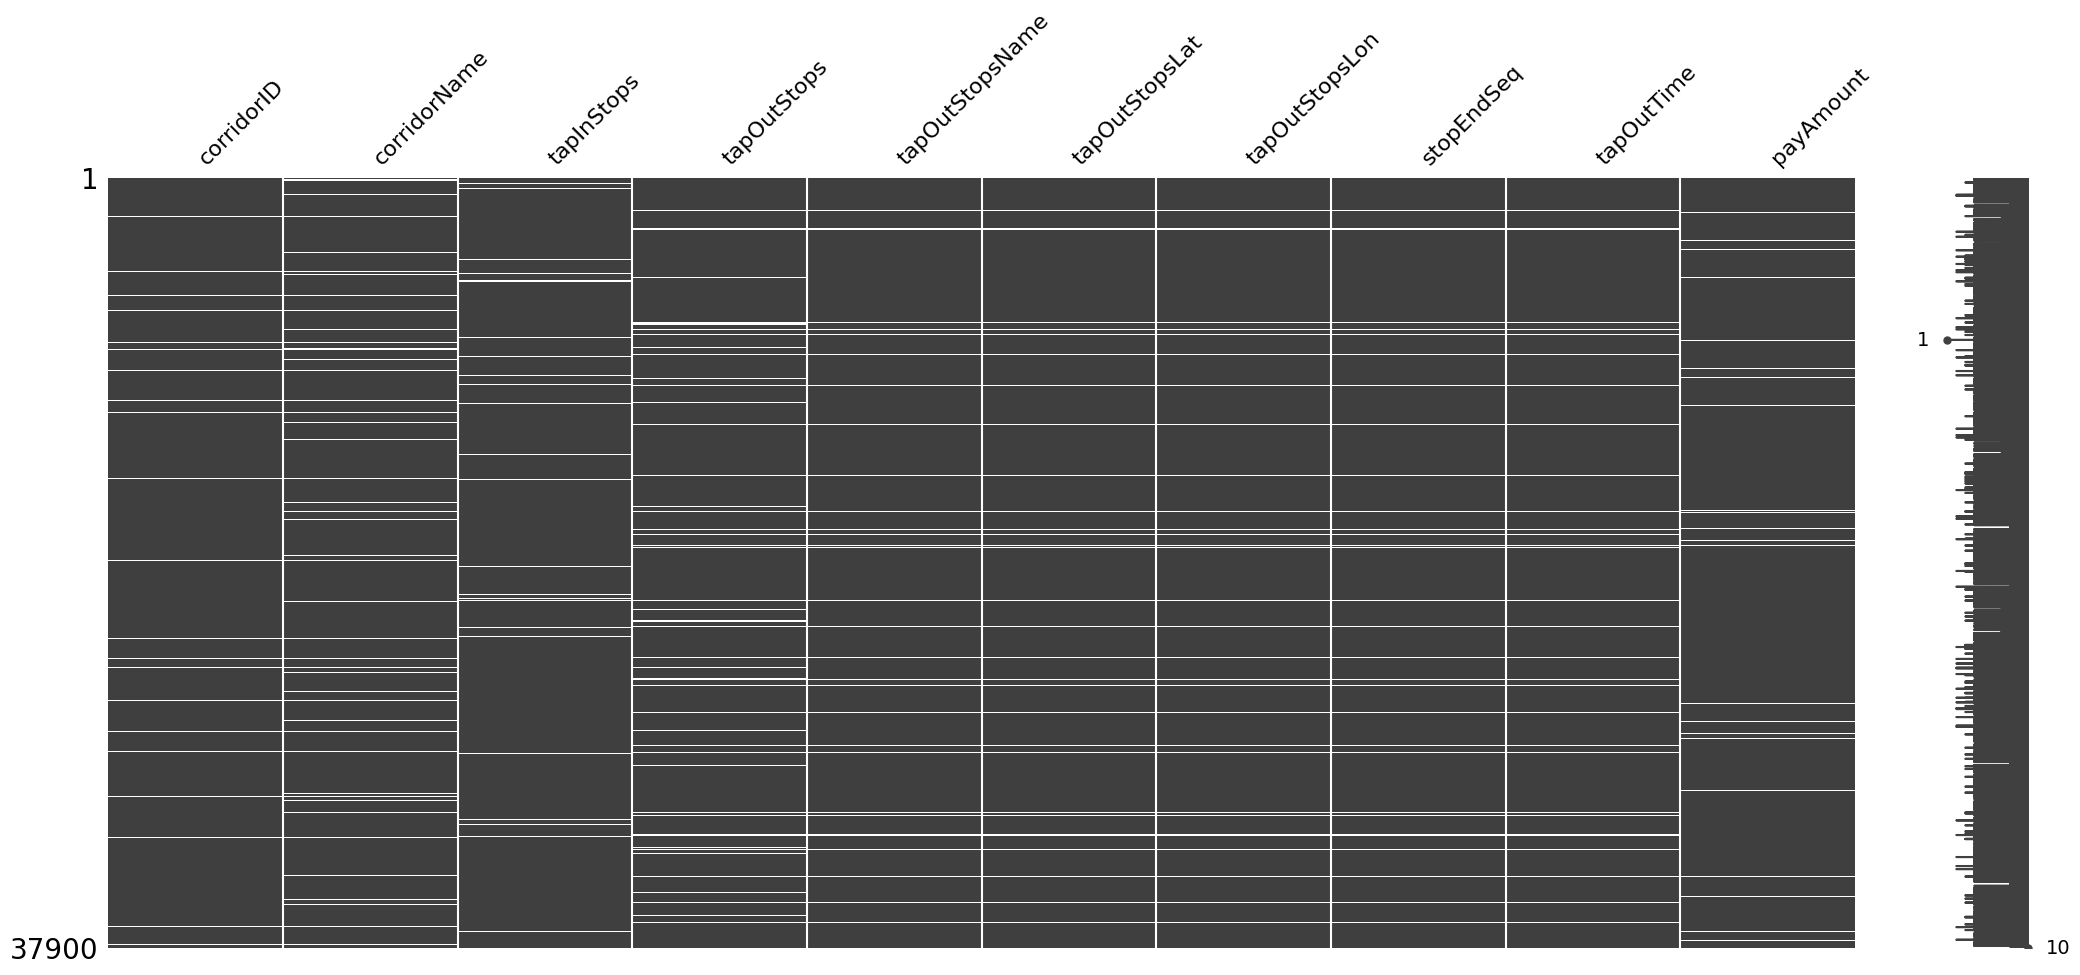

In [9]:
msno.matrix(transjkt[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']])

<Axes: >

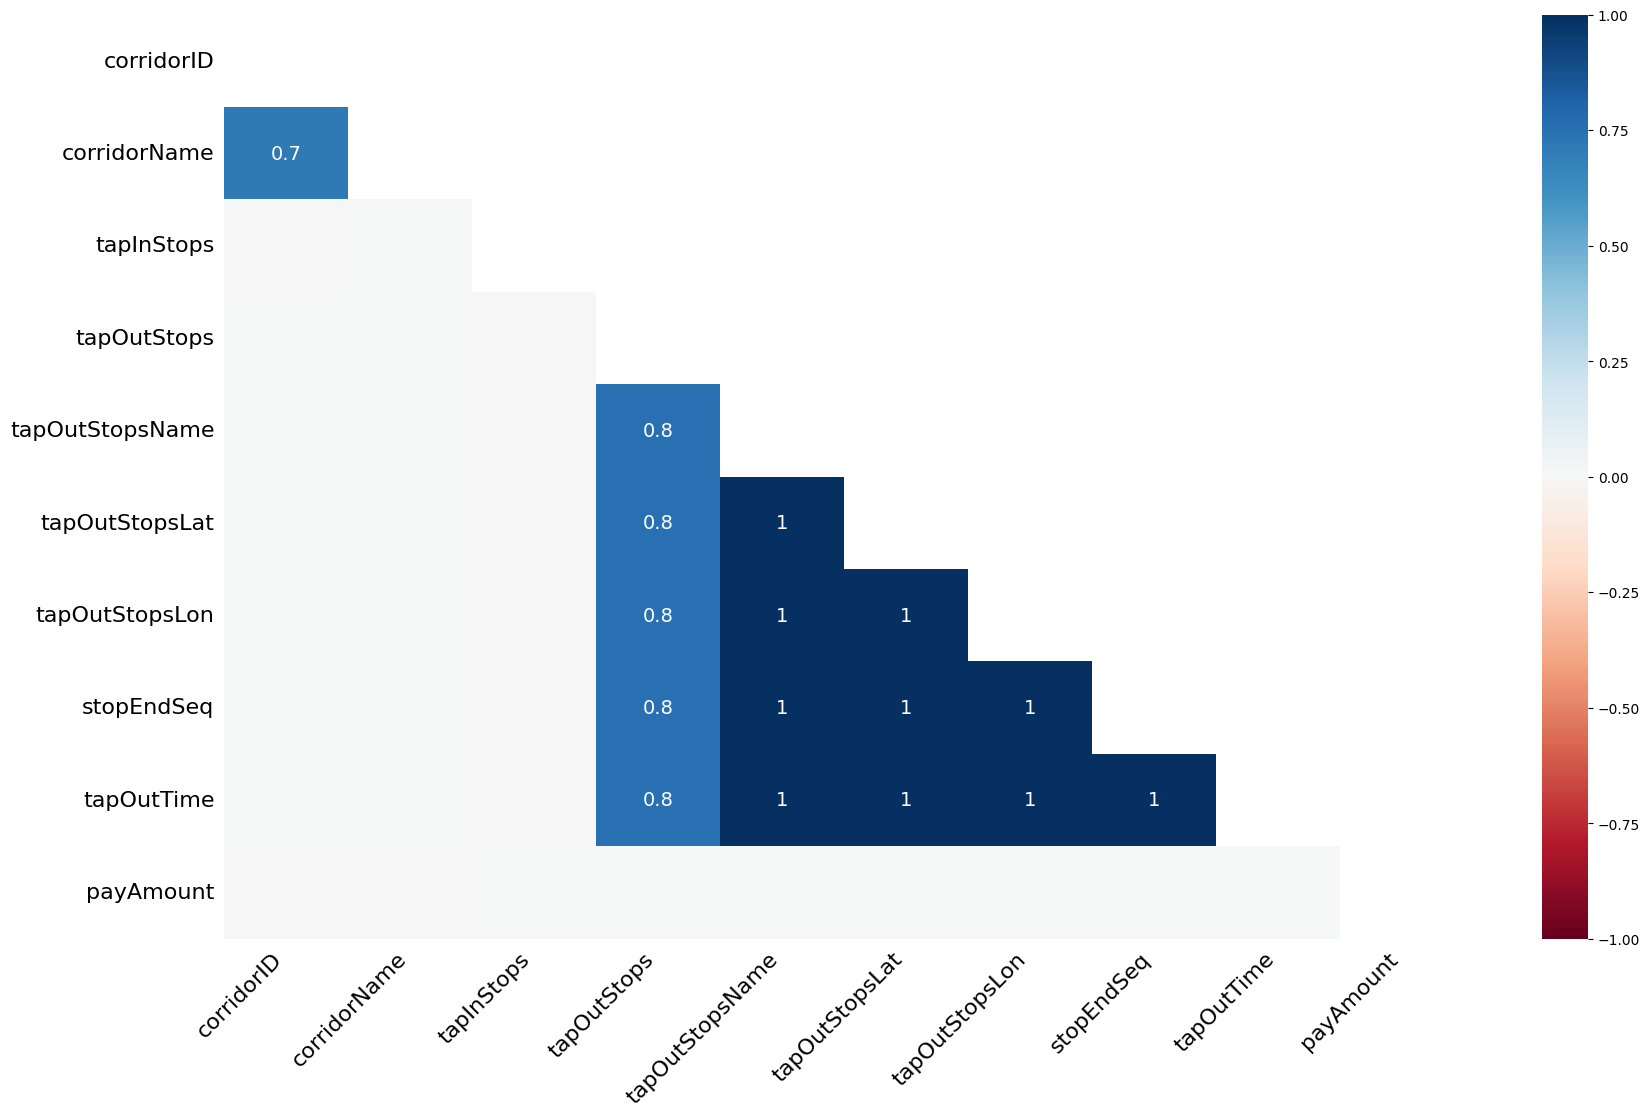

In [10]:
msno.heatmap(transjkt[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']])

- Digunakan *library* **missingno** untuk melakukan visualisasi pada *missing value*
    + missingno matrix digunakan untuk mengetahui hubungan antar *missing value*
    + missingno heatmap digunakan untuk mengetahui hubungan antar *missing value* berdasarkan warna yang menunjukkan nilai tertentu. Sehingga, dapat dikatakan missingno heatmap lebih baik dibandingkan missingno matrix.

#### **3.3 Duplicate Data**

In [11]:
print('Jumlah duplikasi data:',transjkt.duplicated().sum())

Jumlah duplikasi data: 0


#### **3.4 Deteksi Outliers**

In [12]:
numerik = transjkt[['payCardBirthDate','tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'payAmount']]
numerik.head()

,payCardBirthDate,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
0,2008,-6.184631,106.84402,7,-6.203101,106.85715,12.0,3500.0
1,1997,-6.228700,106.83302,13,-6.217152,106.81892,21.0,3500.0
2,1992,-6.133132,106.81435,38,-6.133731,106.81475,39.0,3500.0
3,1978,-6.195743,106.93526,23,-6.183068,106.93194,29.0,3500.0
4,1982,-6.149650,106.88900,5,-6.135355,106.81143,15.0,3500.0


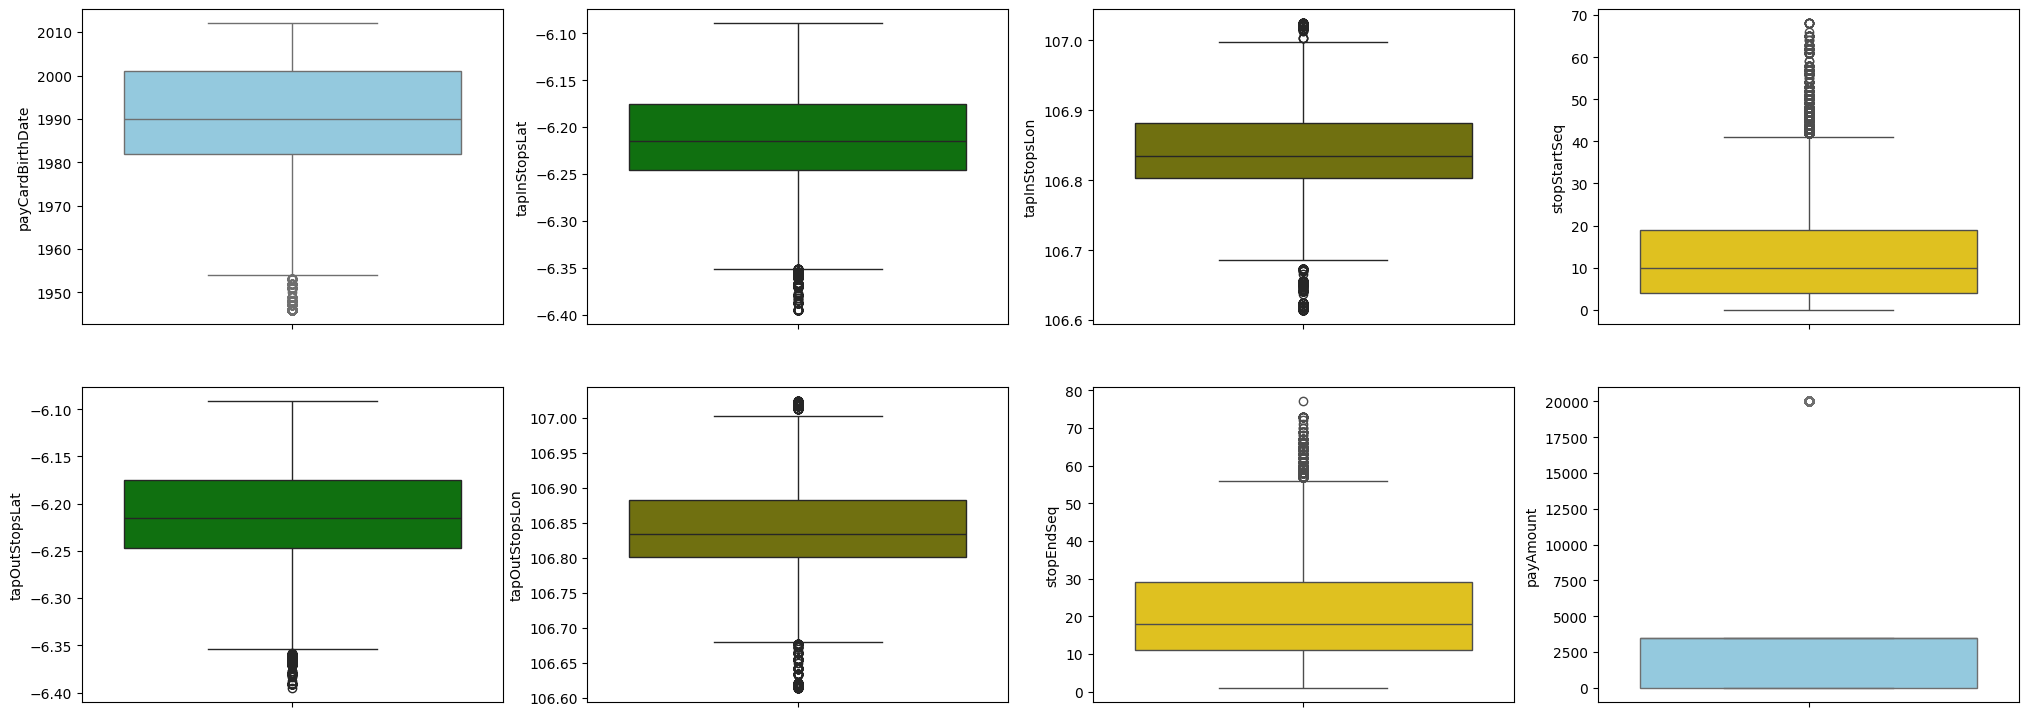

In [13]:
fig, axs = plt.subplots(2, 4, figsize=(25, 9))
sns.boxplot(data = numerik['payCardBirthDate'], color="skyblue", ax=axs[0, 0])
sns.boxplot(data = numerik['tapInStopsLat'], color="green", ax=axs[0, 1])
sns.boxplot(data = numerik['tapInStopsLon'], color="olive", ax=axs[0, 2])
sns.boxplot(data = numerik['stopStartSeq'], color="gold", ax=axs[0, 3])
sns.boxplot(data = numerik['tapOutStopsLat'], color="green", ax=axs[1, 0])
sns.boxplot(data = numerik['tapOutStopsLon'], color="olive", ax=axs[1, 1])
sns.boxplot(data = numerik['stopEndSeq'], color="gold", ax=axs[1, 2])
sns.boxplot(data = numerik['payAmount'], color="skyblue", ax=axs[1, 3])


plt.show()

In [14]:
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Hanya untuk kolom numerik
            Q1 = df[col].quantile(0.25)  # Kuartil pertama
            Q3 = df[col].quantile(0.75)  # Kuartil ketiga
            IQR = Q3 - Q1  # Rentang interkuartil
            
            # Batas bawah dan atas untuk deteksi outlier
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Indeks baris dengan outlier
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Deteksi outlier
outlier_dict = detect_outliers_iqr(numerik)
outlier_results = {col: list(values.index) for col, values in outlier_dict.items()}
outlier_list = []
for col, indices in outlier_results.items():
    outlier_list.append({'Variabel': col, 'Jumlah Outlier Original': len(indices)})

outlier_df = pd.DataFrame(outlier_list)
outlier_df

,Variabel,Jumlah Outlier Original
0,payCardBirthDate,340
1,tapInStopsLat,411
2,tapInStopsLon,558
3,stopStartSeq,1543
4,tapOutStopsLat,359
5,tapOutStopsLon,449
6,stopEndSeq,583
7,payAmount,1742


In [ ]:
outliers_count = []

for column in numerik.columns:
    z_scores = np.abs((numerik[column] - numerik[column].mean()) / numerik[column].std()) # tidak cocok dengan data tidak terdistribusi normal
    count = len(z_scores[z_scores > 2])  # umumnya 2
    outliers_count.append({'Column': column, 'Jumlah Outlier (z-score)': count})

outliers_df = pd.DataFrame(outliers_count)
outliers_df

,Column,Jumlah Outlier (z-score)
0,payCardBirthDate,782
1,tapInStopsLat,1390
2,tapInStopsLon,1387
3,stopStartSeq,2055
4,tapOutStopsLat,1241
5,tapOutStopsLon,1438
6,stopEndSeq,1800
7,payAmount,1742


> **KESIMPULAN DATA UNDERSTANDING**

Dataset *Public Transportation Transaction - Transjakarta* memiliki **22 variabel atau kolom** dan **37900 baris**

- Terdapat beberapa variabel yang type datanya seharusnya diganti:
    + Variabel `direction` bertipe float64, lebih cocok sebagai object karena value variabel ini adalah 0 (mewakili keberangkatan) atau 1 (mewakili pulang).
    + Mengubah nilai 0 menjadi keberangkatan dan nilai 1 menjadi pulang pada variabel `direction`
    + Variabel `tapInTime` dan `tapOutTime` bertipe object, seharusnya bertipe data datetime.
    + Variabel `payCardID` seharusnya bertipe object.
    + Variabel `stopEndSeq` seharusnya bertipe int64 
- **Terdapat missing values** pada beberapa variabel, yaitu corridorID, corridorName, tapInStops, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, dan payAmount.
- Variabel yang memiliki missing value terbanyak adalah tapOutStops sebesar 6.04%.
- Berdasarkan output missingno matrix dan missingno heatmap, dapat diketahui:
    + *Missing value* antara variabel corridorID dengan corridorName memiliki hubungan kuat. Artinya, jika variabel corridorID terdapat *missing value*, maka variabel corridorName terdapat *missing value*.
    + *Missing value* antara variabel berikut, seperti tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, dan tapOutTime memiliki hubungan kuat. Artinya, jika variabel tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, dan tapOutTime terdapat *missing value*, maka pada variabel tapOutStops terdapat *missing value*.
    + Terdapat beberapa *missing value* pada variabel corridorName, tapInStops, dan tapOutStops yang memiliki sebaran yang berdiri sendiri. 
    + *Missing value* pada variabel payAmount memiliki sebaran yang berdiri sendiri, meskipun terdapat beberapa *missing value* yang berhubungan dengan variabel tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, dan tapOutTime. 
- **Tidak ditemukan duplikasi data.** 
- Berdasarkan output deteksi outlier dengan menggunakan IQR dan Z-Score, diperoleh perbedaan output yang cukup signifikan. Namun, hanya variabel payAmount yang memiliki jumlah outlier yang sama pada kedua output.

### **4. Data Cleaning**

Langkah Data Cleaning:
1. Handle Missing Value
2. Konversi Type Data
3. Handle Outlier

> Alasan dilakukan handling missing value terlebih dahulu karena untuk memastikan data tetap konsisten dan mencegah adanya bias. 

Sebelum dilakukan data cleaning, dibuat variabel baru yang menyimpan salinan data tranjakarta dengan tujuan keamanan data. 

In [ ]:
df = transjkt.copy()
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


#### **4.1 Handle Missing Value**

Cara mengatasi *missing value*:
1. Mengisi *missing value* dengan median, mean , atau modus. 
2. Menghapus *missing value*. 
Namun, cara 1 sebaiknya dihindari karena dapat memengaruhi kualitas analisis data. 

Digunakan cara 1 apabila jumlah missing value sangat kecil (kurang dari 5%) atau sangat tinggi, tetapi tidak penting. 

##### **4.1.1 tapOutStopsLat & tapOutStopsLon**

Untuk menghilangkan *missing value* pada kedua variabel ini, disesuaikan dengan value variabel tapOutStopsName. Sebelum itu, dilakukan cek terlebih dahulu. 

In [17]:
nan_same_row = (df['tapOutStopsName'].isna()) & (df['tapOutStopsLat'].isna()) & (df['tapOutStopsLon'].isna())

nan_rows = df[nan_same_row]

print(f"Jumlah baris dengan NaN di tapOutStopsName, tapOutStopsLat dan tapOutStopsLon: {nan_rows.shape[0]}")
nan_rows

Jumlah baris dengan NaN di tapOutStopsName, tapOutStopsLat dan tapOutStopsLon: 1344


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,NaN,NaN,0.0
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,...,106.82190,7,2023-04-03 05:57:55,NaN,NaN,NaN,NaN,NaN,NaN,20000.0
130,JUKK703H7F00XH,570918242399,flazz,Mumpuni Gunarto,F,1998,10D,Kampung Rambutan - Tanjung Priok,0.0,P00035,...,106.87920,7,2023-04-03 05:40:04,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
192,KKPV811K6H59ZY,3548650711273610,dki,Balangga Permadi,F,2011,3F,Kalideres - Gelora Bung Karno,0.0,P00050,...,106.73810,11,2023-04-03 06:15:53,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37738,HVBG065E5W16QD,5340783842827882,dki,Rendy Pratama,F,1989,5F,Kampung Melayu - Tanah Abang,1.0,B02318P,...,106.81516,0,2023-04-30 07:34:10,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
37762,LBYO897O0Z89FX,4159889370953,online,Vera Pangestu,F,1992,JAK.18,Kalibata - Kuningan,0.0,B00573P,...,106.85280,20,2023-04-21 12:08:43,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37777,JBJR710B1I01HV,4380502298652105326,brizzi,Ella Zulkarnain,M,1990,JAK.30,Grogol - Meruya via Roxy,1.0,B01914P,...,106.77307,43,2023-04-03 21:59:15,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37796,UJTW104Z9P85GX,6507084113625619,dki,Kairav Yulianti,F,2002,8M,S. Parman - Tanah Abang,0.0,B03062P,...,106.81088,7,2023-04-02 05:55:01,NaN,NaN,NaN,NaN,NaN,NaN,3500.0


Berdasarkan output di atas, cara untuk mengatasi *missing value* pada variabel tapOutStopsLat dan tapOutStopsLon adalah dihapus. Hal ini karena seluruh *missing value* pada kedua variabel ini tidak memiliki nilai pada variabel tapOutStopsName.

In [18]:
df = df.dropna(subset=['tapOutStopsLat', 'tapOutStopsLon'])


jum_missvalue = transjkt.isna().sum()
jum_missvalue_after = df.isna().sum()
percentage_missvalue = round(transjkt.isnull().sum()/len(transjkt)*100, 2)
percentage_missvalue_after = round(df.isnull().sum()/len(transjkt)*100, 2)
missing_value = pd.DataFrame({'Jumlah': jum_missvalue, 
                              'Persentase (%)': percentage_missvalue,
                              'Jumlah Setelah Handling': jum_missvalue_after,
                              'Persentase Setelah Handling (%)': percentage_missvalue_after})
missing_value = missing_value[missing_value['Jumlah']!=0].sort_values('Persentase (%)', ascending=False)
missing_value

,Jumlah,Persentase (%),Jumlah Setelah Handling,Persentase Setelah Handling (%)
tapOutStops,2289,6.04,945,2.49
corridorName,1930,5.09,1854,4.89
tapOutStopsName,1344,3.55,0,0.00
tapOutStopsLat,1344,3.55,0,0.00
tapOutStopsLon,1344,3.55,0,0.00
stopEndSeq,1344,3.55,0,0.00
tapOutTime,1344,3.55,0,0.00
corridorID,1257,3.32,1205,3.18
tapInStops,1213,3.20,1177,3.11
payAmount,1007,2.66,968,2.55


##### **4.1.2 tapInStops**

Variabel tapInStops memiliki jumlah missing value sebanyak 1177 atau 3.11%. Untuk mengatasi missing value variabel ini, disesuaikan dengan variabel tapInStopsName. 

In [19]:
def fill_missing_corridor(row, data):
    if pd.isna(row['tapInStops']):
        match = data[
            (data['tapInStopsName'] == row['tapInStopsName']) &
            (~data['tapInStops'].isna())
        ]
        # Menggunakan baris pertama yang cocok untuk mengisi nilai
        if not match.empty:
            row['tapInStops'] = match.iloc[0]['tapInStops']
    return row

df = df.apply(lambda row: fill_missing_corridor(row, df), axis=1)

In [20]:
jum_missvalue = transjkt.isna().sum()
jum_missvalue_after = df.isna().sum()
percentage_missvalue = round(transjkt.isnull().sum()/len(transjkt)*100, 2)
percentage_missvalue_after = round(df.isnull().sum()/len(transjkt)*100, 2)
missing_value = pd.DataFrame({'Jumlah': jum_missvalue, 
                              'Persentase (%)': percentage_missvalue,
                              'Jumlah Setelah Handling': jum_missvalue_after,
                              'Persentase Setelah Handling (%)': percentage_missvalue_after})
missing_value = missing_value[missing_value['Jumlah']!=0].sort_values('Persentase (%)', ascending=False)
missing_value

,Jumlah,Persentase (%),Jumlah Setelah Handling,Persentase Setelah Handling (%)
tapOutStops,2289,6.04,945,2.49
corridorName,1930,5.09,1854,4.89
tapOutStopsName,1344,3.55,0,0.00
tapOutStopsLat,1344,3.55,0,0.00
tapOutStopsLon,1344,3.55,0,0.00
stopEndSeq,1344,3.55,0,0.00
tapOutTime,1344,3.55,0,0.00
corridorID,1257,3.32,1205,3.18
tapInStops,1213,3.20,32,0.08
payAmount,1007,2.66,968,2.55


Setelah menyesuaikan nilai variabel tapInStopsName untuk imputasi nilai tapInStops, masih terdapat *missing value* sebanyak 32 atau 3.18%. Oleh karena itu, *missing value* yang tersisa dihapus untuk menghindari representasi yang salah atau menimbulkan bias.

In [21]:
df = df.dropna(subset=['tapInStops'])

jum_missvalue = transjkt.isna().sum()
jum_missvalue_after = df.isna().sum()
percentage_missvalue = round(transjkt.isnull().sum()/len(transjkt)*100, 2)
percentage_missvalue_after = round(df.isnull().sum()/len(transjkt)*100, 2)
missing_value = pd.DataFrame({'Jumlah': jum_missvalue, 
                              'Persentase (%)': percentage_missvalue,
                              'Jumlah Setelah Handling': jum_missvalue_after,
                              'Persentase Setelah Handling (%)': percentage_missvalue_after})
missing_value = missing_value[missing_value['Jumlah']!=0].sort_values('Persentase (%)', ascending=False)
missing_value

,Jumlah,Persentase (%),Jumlah Setelah Handling,Persentase Setelah Handling (%)
tapOutStops,2289,6.04,944,2.49
corridorName,1930,5.09,1853,4.89
tapOutStopsName,1344,3.55,0,0.00
tapOutStopsLat,1344,3.55,0,0.00
tapOutStopsLon,1344,3.55,0,0.00
stopEndSeq,1344,3.55,0,0.00
tapOutTime,1344,3.55,0,0.00
corridorID,1257,3.32,1205,3.18
tapInStops,1213,3.20,0,0.00
payAmount,1007,2.66,967,2.55


##### **4.1.3 tapOutStops**

Variabel tapOutStops memiliki jumlah *missing value* sebanyak 944 atau 2.49%. Untuk mengisi *missing value* pada variabel ini, disesuaikan dengan value pada variabel tapOutStopsLat dan tapOutStopsLon yang sama.

In [22]:
def fill_missing_corridor(row, data):
    if pd.isna(row['tapOutStops']):
        match = data[
            (data['tapOutStopsLat'] == row['tapOutStopsLat']) &
            (data['tapOutStopsLon'] == row['tapOutStopsLon']) &
            (~data['tapOutStops'].isna())
        ]
        # Menggunakan baris pertama yang cocok untuk mengisi nilai
        if not match.empty:
            row['tapOutStops'] = match.iloc[0]['tapOutStops']
    return row

df = df.apply(lambda row: fill_missing_corridor(row, df), axis=1)

In [23]:
jum_missvalue = transjkt.isna().sum()
jum_missvalue_after = df.isna().sum()
percentage_missvalue = round(transjkt.isnull().sum()/len(transjkt)*100, 2)
percentage_missvalue_after = round(df.isnull().sum()/len(transjkt)*100, 2)
missing_value = pd.DataFrame({'Jumlah': jum_missvalue, 
                              'Persentase (%)': percentage_missvalue,
                              'Jumlah Setelah Handling': jum_missvalue_after,
                              'Persentase Setelah Handling (%)': percentage_missvalue_after})
missing_value = missing_value[missing_value['Jumlah']!=0].sort_values('Persentase (%)', ascending=False)
missing_value

,Jumlah,Persentase (%),Jumlah Setelah Handling,Persentase Setelah Handling (%)
tapOutStops,2289,6.04,18,0.05
corridorName,1930,5.09,1853,4.89
tapOutStopsName,1344,3.55,0,0.00
tapOutStopsLat,1344,3.55,0,0.00
tapOutStopsLon,1344,3.55,0,0.00
stopEndSeq,1344,3.55,0,0.00
tapOutTime,1344,3.55,0,0.00
corridorID,1257,3.32,1205,3.18
tapInStops,1213,3.20,0,0.00
payAmount,1007,2.66,967,2.55


Setelah menyesuaikan nilai variabel tapOutStopsLat dan tapOutStopsLon untuk imputasi nilai tapOutStops, masih terdapat *missing value* sebanyak 18 atau 0.05%. Oleh karena itu, *missing value* yang tersisa dihapus untuk menghindari representasi yang salah atau menimbulkan bias.

In [24]:
df = df.dropna(subset=['tapOutStops'])

jum_missvalue = transjkt.isna().sum()
jum_missvalue_after = df.isna().sum()
percentage_missvalue = round(transjkt.isnull().sum()/len(transjkt)*100, 2)
percentage_missvalue_after = round(df.isnull().sum()/len(transjkt)*100, 2)
missing_value = pd.DataFrame({'Jumlah': jum_missvalue, 
                              'Persentase (%)': percentage_missvalue,
                              'Jumlah Setelah Handling': jum_missvalue_after,
                              'Persentase Setelah Handling (%)': percentage_missvalue_after})
missing_value = missing_value[missing_value['Jumlah']!=0].sort_values('Persentase (%)', ascending=False)
missing_value

,Jumlah,Persentase (%),Jumlah Setelah Handling,Persentase Setelah Handling (%)
tapOutStops,2289,6.04,0,0.00
corridorName,1930,5.09,1853,4.89
tapOutStopsName,1344,3.55,0,0.00
tapOutStopsLat,1344,3.55,0,0.00
tapOutStopsLon,1344,3.55,0,0.00
stopEndSeq,1344,3.55,0,0.00
tapOutTime,1344,3.55,0,0.00
corridorID,1257,3.32,1205,3.18
tapInStops,1213,3.20,0,0.00
payAmount,1007,2.66,967,2.55


##### **4.1.4 corridorID & corridorName**

Berdasarkan hasil missingno matrix, *missing value* antara variabel corridorID dengan corridorName memiliki hubungan yang kuat. Namun, terdapat beberapa *missing value* pada variabel corridorName memiliki sebaran yang berdiri sendiri. Oleh karena itu, untuk mengisi nilai *missing value* corridorName disesuaikan dengan nilai corridorID

In [25]:
def fill_missing_corridor(row, data):
    if pd.isna(row['corridorName']):
        match = data[
            (data['corridorID'] == row['corridorID']) &
            (~data['corridorName'].isna())
        ]
        # Menggunakan baris pertama yang cocok untuk mengisi nilai
        if not match.empty:
            row['corridorName'] = match.iloc[0]['corridorName']
    return row

df = df.apply(lambda row: fill_missing_corridor(row, df), axis=1)

In [26]:
jum_missvalue = transjkt.isna().sum()
jum_missvalue_after = df.isna().sum()
percentage_missvalue = round(transjkt.isnull().sum()/len(transjkt)*100, 2)
percentage_missvalue_after = round(df.isnull().sum()/len(transjkt)*100, 2)
missing_value = pd.DataFrame({'Jumlah': jum_missvalue, 
                              'Persentase (%)': percentage_missvalue,
                              'Jumlah Setelah Handling': jum_missvalue_after,
                              'Persentase Setelah Handling (%)': percentage_missvalue_after})
missing_value = missing_value[missing_value['Jumlah']!=0].sort_values('Persentase (%)', ascending=False)
missing_value

,Jumlah,Persentase (%),Jumlah Setelah Handling,Persentase Setelah Handling (%)
tapOutStops,2289,6.04,0,0.00
corridorName,1930,5.09,1078,2.84
tapOutStopsName,1344,3.55,0,0.00
tapOutStopsLat,1344,3.55,0,0.00
tapOutStopsLon,1344,3.55,0,0.00
stopEndSeq,1344,3.55,0,0.00
tapOutTime,1344,3.55,0,0.00
corridorID,1257,3.32,1205,3.18
tapInStops,1213,3.20,0,0.00
payAmount,1007,2.66,967,2.55


Setelah dilakukan imputasi, masih ditemukan missing value. Untuk mengatasi hal ini, dilakukan imputasi variabel corridorName dan corridorID berdasarkan nilai pada variabel tapInStopsName.

In [27]:
def fill_missing_corridor(row, data):
    if pd.isna(row['corridorID']) and pd.isna(row['corridorName']):
        match = data[
            (data['tapInStopsName'] == row['tapInStopsName']) &
            (~data['corridorID'].isna()) & (~data['corridorName'].isna())
        ]
        # Menggunakan baris pertama yang cocok untuk mengisi nilai
        if not match.empty:
            row['corridorID'] = match.iloc[0]['corridorID']
            row['corridorName'] = match.iloc[0]['corridorName']
    return row

df = df.apply(lambda row: fill_missing_corridor(row, df), axis=1)

In [28]:
jum_missvalue = transjkt.isna().sum()
jum_missvalue_after = df.isna().sum()
percentage_missvalue = round(transjkt.isnull().sum()/len(transjkt)*100, 2)
percentage_missvalue_after = round(df.isnull().sum()/len(transjkt)*100, 2)
missing_value = pd.DataFrame({'Jumlah': jum_missvalue, 
                              'Persentase (%)': percentage_missvalue,
                              'Jumlah Setelah Handling': jum_missvalue_after,
                              'Persentase Setelah Handling (%)': percentage_missvalue_after})
missing_value = missing_value[missing_value['Jumlah']!=0].sort_values('Persentase (%)', ascending=False)
missing_value

,Jumlah,Persentase (%),Jumlah Setelah Handling,Persentase Setelah Handling (%)
tapOutStops,2289,6.04,0,0.00
corridorName,1930,5.09,32,0.08
tapOutStopsName,1344,3.55,0,0.00
tapOutStopsLat,1344,3.55,0,0.00
tapOutStopsLon,1344,3.55,0,0.00
stopEndSeq,1344,3.55,0,0.00
tapOutTime,1344,3.55,0,0.00
corridorID,1257,3.32,159,0.42
tapInStops,1213,3.20,0,0.00
payAmount,1007,2.66,967,2.55


Setelah dilakukan imputasi nilai untuk mengatasi corridorName dan corridorID, masih terdapat *missing value*. Oleh karena itu, *missing value* yang tersisa dihapus untuk menghindari representasi yang salah atau menimbulkan bias.

In [29]:
df = df.dropna(subset=['corridorName', 'corridorID'])

jum_missvalue = transjkt.isna().sum()
jum_missvalue_after = df.isna().sum()
percentage_missvalue = round(transjkt.isnull().sum()/len(transjkt)*100, 2)
percentage_missvalue_after = round(df.isnull().sum()/len(transjkt)*100, 2)
missing_value = pd.DataFrame({'Jumlah': jum_missvalue, 
                              'Persentase (%)': percentage_missvalue,
                              'Jumlah Setelah Handling': jum_missvalue_after,
                              'Persentase Setelah Handling (%)': percentage_missvalue_after})
missing_value = missing_value[missing_value['Jumlah']!=0].sort_values('Persentase (%)', ascending=False)
missing_value

,Jumlah,Persentase (%),Jumlah Setelah Handling,Persentase Setelah Handling (%)
tapOutStops,2289,6.04,0,0.00
corridorName,1930,5.09,0,0.00
tapOutStopsName,1344,3.55,0,0.00
tapOutStopsLat,1344,3.55,0,0.00
tapOutStopsLon,1344,3.55,0,0.00
stopEndSeq,1344,3.55,0,0.00
tapOutTime,1344,3.55,0,0.00
corridorID,1257,3.32,0,0.00
tapInStops,1213,3.20,0,0.00
payAmount,1007,2.66,964,2.54


##### **4.1.5 payAmount**

In [30]:
df[df['payAmount'].isnull()]['corridorID'].value_counts()

corridorID
M7B        305
JAK.48A    241
M1H        167
JAK.48B    152
3H          91
9D           2
6D           2
6Q           1
B13          1
M3           1
6C           1
Name: count, dtype: int64

1. Tarif Transjakarta: **(<a href = 'https://blog.cove.id/transjakarta-di-jakarta-pusat/'>Link Sumber</a>)**
    - Pukul 05.00 - 07.00 WIB: Rp2.000
    - Pukul 07.00 - seterusnya: Rp3.500
2. Tarif Mikrotrans atau JakLingko: **(<a href = 'https://economy.okezone.com/read/2024/08/03/320/3043869/daftar-lengkap-tarif-jaklingko-cek-di-sini'>Link Sumber</a>)**

    - Rp0 atau tidak ada saldo terpotong
3. Tarif Royaltrans: **(<a href = 'https://megapolitan.kompas.com/read/2024/10/31/02000051/rute-dan-tarif-royaltrans-jabodetabek-2024'>Link Sumber</a>)**
    - Rute 1K, 1T, 6P, B13, B14, D31, D32, S12, S31: Rp20.000
    - Rute S13, S14, T21: Rp35.000

Berdasarkan referensi, dapat diketahui bahwa *missing value* pada variabel payAmount berdasarkan corridorID sebagai berikut:
- Transjakarta: 9D, 6D, 6Q, 6C, 3H, M3, M7B, M1H
- Royaltrans: B13
- Mikrotrans atau JakLingko: JAK.48A, JAK.48B

In [31]:
df.loc[(df['corridorID'] == 'B13') & (df['payAmount'].isna()), 'payAmount'] = 20000
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [32]:
df.loc[df['corridorID'].str.startswith('JAK', na=False), 'payAmount'] = 0
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [33]:
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

morning_condition = (df['tapOutTime'].dt.hour >= 5) & (df['tapOutTime'].dt.hour < 7)
after_morning_condition = df['tapOutTime'].dt.hour >= 7

In [34]:
df.loc[df['payAmount'].isna() & morning_condition, 'payAmount'] = 2000
df.loc[df['payAmount'].isna() & after_morning_condition, 'payAmount'] = 3500

In [35]:
jum_missvalue = transjkt.isna().sum()
jum_missvalue_after = df.isna().sum()
percentage_missvalue = round(transjkt.isnull().sum()/len(transjkt)*100, 2)
percentage_missvalue_after = round(df.isnull().sum()/len(transjkt)*100, 2)
missing_value = pd.DataFrame({'Jumlah': jum_missvalue, 
                              'Persentase (%)': percentage_missvalue,
                              'Jumlah Setelah Handling': jum_missvalue_after,
                              'Persentase Setelah Handling (%)': percentage_missvalue_after})
missing_value = missing_value[missing_value['Jumlah']!=0].sort_values('Persentase (%)', ascending=False)
missing_value

,Jumlah,Persentase (%),Jumlah Setelah Handling,Persentase Setelah Handling (%)
tapOutStops,2289,6.04,0,0.0
corridorName,1930,5.09,0,0.0
tapOutStopsName,1344,3.55,0,0.0
tapOutStopsLat,1344,3.55,0,0.0
tapOutStopsLon,1344,3.55,0,0.0
stopEndSeq,1344,3.55,0,0.0
tapOutTime,1344,3.55,0,0.0
corridorID,1257,3.32,0,0.0
tapInStops,1213,3.20,0,0.0
payAmount,1007,2.66,0,0.0


In [36]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


Setelah dilakukan handle missing value, ternyata terdapat kesalahan inputasi. Data payAmount Transjakarta pukul 05.00-07.00 seharusnya Rp2000 terisi sebesar Rp3500. Oleh karena itu, dilakukan perubahan dengan menggunakan .loc. 

In [37]:
excluded_corridorIDs = ['1K', '1T', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S31', 'S13', 'S14', 'T21']

excluded_condition = (
    df['corridorID'].isin(excluded_corridorIDs) | 
    df['corridorID'].str.startswith('JAK')
)

df.loc[~excluded_condition & morning_condition, 'payAmount'] = 2000
df.loc[~excluded_condition & after_morning_condition, 'payAmount'] = 3500

df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,2000.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,2000.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,2000.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,2000.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,2000.0


#### **4.2 Konversi Type Data**

Berdasarkan hasil analisis pada data understanding, dapat diketahui terdapat beberapa variabel yang perlu dilakukan konversi type data, seperti variabel direction, tapInTime, tapOutTime, payCardID, stopEndSeq. Namun, variabel tapOutTime telah dilakukan konversi pada tahapan *handle missing value*.

In [38]:
df['direction'] = df['direction'].astype(str)         # float64 -> object
df['tapInTime'] = pd.to_datetime(df['tapInTime'])            # object -> datetime
df['payCardID'] = df['payCardID'].astype(str)                # int64 -> object
df['stopEndSeq'] = df['stopEndSeq'].astype("int64")            # float64 -> int64

In [39]:
df['direction'] = df["direction"].replace({'0.0': "Keberangkatan", '1.0': "Pulang"})
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pulang,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12,2023-04-03 06:00:53,2000.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Keberangkatan,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21,2023-04-03 06:40:01,2000.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Keberangkatan,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39,2023-04-03 06:50:55,2000.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Keberangkatan,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29,2023-04-03 06:28:16,2000.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Keberangkatan,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15,2023-04-03 06:57:03,2000.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36347 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36347 non-null  object        
 1   payCardID         36347 non-null  object        
 2   payCardBank       36347 non-null  object        
 3   payCardName       36347 non-null  object        
 4   payCardSex        36347 non-null  object        
 5   payCardBirthDate  36347 non-null  int64         
 6   corridorID        36347 non-null  object        
 7   corridorName      36347 non-null  object        
 8   direction         36347 non-null  object        
 9   tapInStops        36347 non-null  object        
 10  tapInStopsName    36347 non-null  object        
 11  tapInStopsLat     36347 non-null  float64       
 12  tapInStopsLon     36347 non-null  float64       
 13  stopStartSeq      36347 non-null  int64         
 14  tapInTime         36347 non

#### **4.3 Handle Outlier**

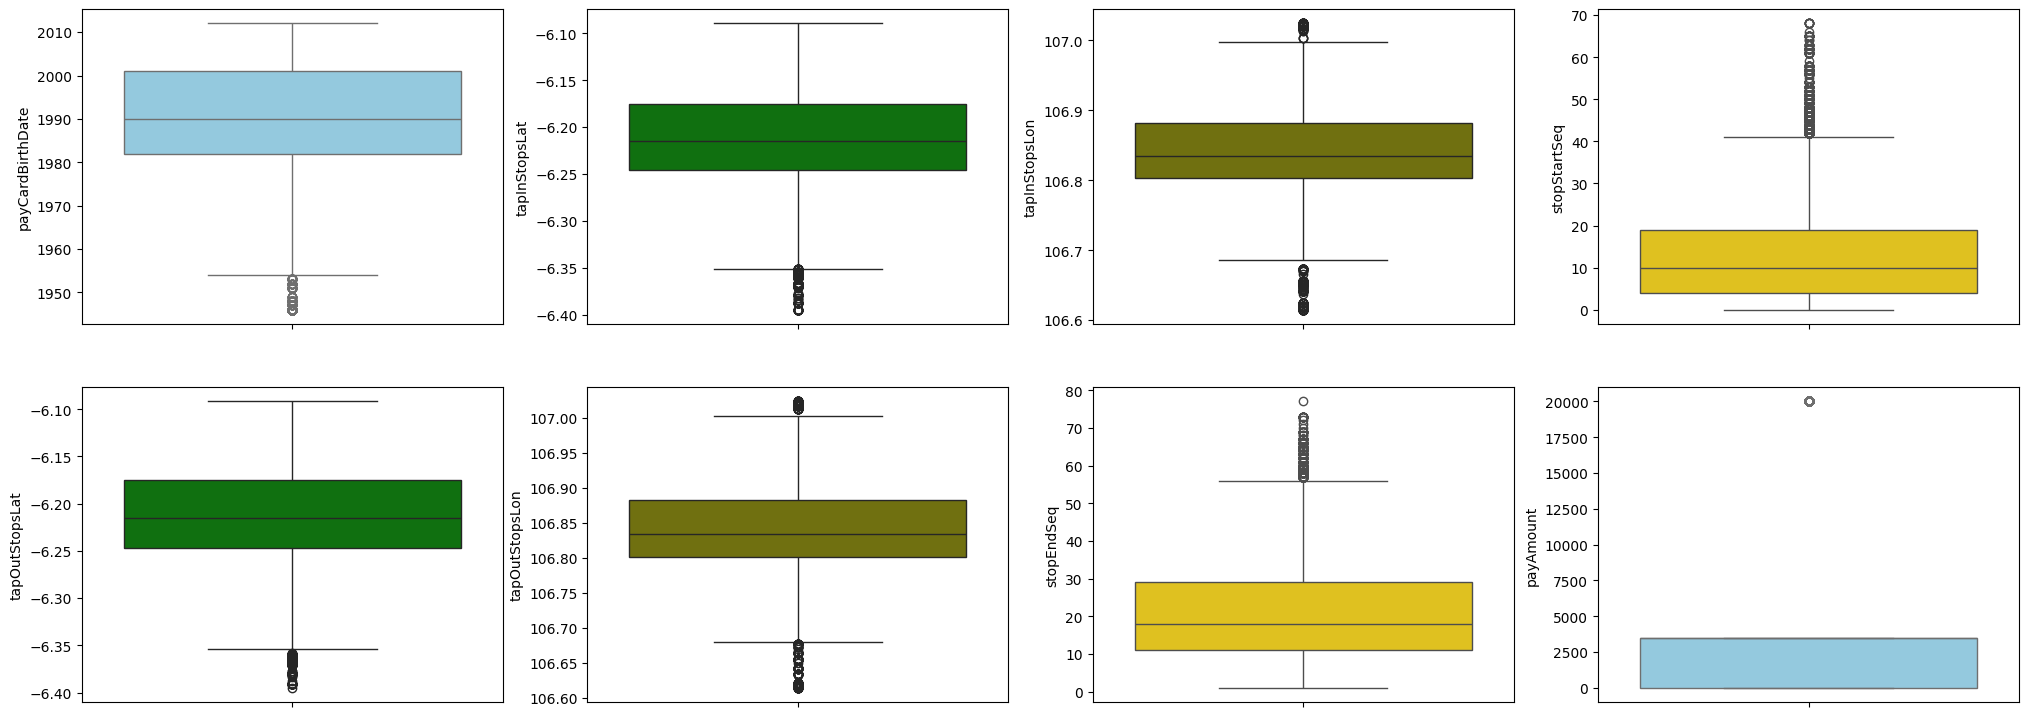

In [41]:
fig, axs = plt.subplots(2, 4, figsize=(25, 9))
sns.boxplot(data = df['payCardBirthDate'], color="skyblue", ax=axs[0, 0])
sns.boxplot(data = df['tapInStopsLat'], color="green", ax=axs[0, 1])
sns.boxplot(data = df['tapInStopsLon'], color="olive", ax=axs[0, 2])
sns.boxplot(data = df['stopStartSeq'], color="gold", ax=axs[0, 3])
sns.boxplot(data = df['tapOutStopsLat'], color="green", ax=axs[1, 0])
sns.boxplot(data = df['tapOutStopsLon'], color="olive", ax=axs[1, 1])
sns.boxplot(data = df['stopEndSeq'], color="gold", ax=axs[1, 2])
sns.boxplot(data = df['payAmount'], color="skyblue", ax=axs[1, 3])


plt.show()

In [42]:
# Deteksi outlier
outlier_dict = detect_outliers_iqr(df)
outlier_results = {col: list(values.index) for col, values in outlier_dict.items()}
outlier_list = []
for col, indices in outlier_results.items():
    outlier_list.append({'Variabel': col, 'Jumlah Outlier Setelah Handle Missing Value': len(indices)})

outlier_df2 = pd.DataFrame(outlier_list)

outlier = outlier_df.merge(outlier_df2)
outlier

,Variabel,Jumlah Outlier Original,Jumlah Outlier Setelah Handle Missing Value
0,payCardBirthDate,340,323
1,tapInStopsLat,411,392
2,tapInStopsLon,558,537
3,stopStartSeq,1543,1476
4,tapOutStopsLat,359,358
5,tapOutStopsLon,449,446
6,stopEndSeq,583,572
7,payAmount,1742,1680


In [43]:
numeric_columns = df.select_dtypes(include=[np.number])
iqr_data = {}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    iqr_data[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

iqr_df = pd.DataFrame(iqr_data).T
iqr_df

,Q1,Q3,IQR,lower_bound,upper_bound
payCardBirthDate,1982.000000,2001.000000,19.000000,1953.500000,2029.500000
tapInStopsLat,-6.245863,-6.175579,0.070284,-6.351289,-6.070153
tapInStopsLon,106.803470,106.882260,0.078790,106.685285,107.000445
stopStartSeq,4.000000,19.000000,15.000000,-18.500000,41.500000
tapOutStopsLat,-6.247225,-6.174736,0.072489,-6.355958,-6.066002
tapOutStopsLon,106.801750,106.883030,0.081280,106.679830,107.004950
stopEndSeq,11.000000,29.000000,18.000000,-16.000000,56.000000
payAmount,0.000000,3500.000000,3500.000000,-5250.000000,8750.000000


In [44]:
outliers_data = {}

for col, bounds in iqr_df.iterrows():
    outliers = df[(df[col] < bounds['lower_bound']) | (df[col] > bounds['upper_bound'])]
    outliers_data[col] = outliers[col].value_counts()

outliers_df = pd.DataFrame(outliers_data)
outliers_df

,payCardBirthDate,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
-6.394973,NaN,37.0,NaN,NaN,1.0,NaN,NaN,NaN
-6.391068,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN
-6.387532,NaN,7.0,NaN,NaN,1.0,NaN,NaN,NaN
-6.387291,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
-6.384603,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1949.000000,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951.000000,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952.000000,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953.000000,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Berdasarkan hasil deteksi outlier dengan menggunakan visualisasi boxplot dan statistik menggunakan IQR, dapat diketahui:
- Terdapat beberapa outlier pada variabel payCardBirthDate. Outlier tersebut adalah data dengan tahun kelahiran sebelum 1953.
- Terdapat beberapa outlier pada variabel tapInStopsLat dan tapOutStopsLat. 
- Variabel tapInStopsLon, stopStartSeq, tapOutStopsLon, dan stopEndSeq tidak terdeteksi outlier. 
- Terdapat 1680 outlier pada variabel payAmount pada nilai 20000. Hal ini perlu dipahami lebih lanjut karena transaksi dengan tarif 20000 valid pada beberapa jenis transjakarta.

In [45]:
df2 = df.copy()
df2.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pulang,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12,2023-04-03 06:00:53,2000.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Keberangkatan,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21,2023-04-03 06:40:01,2000.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Keberangkatan,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39,2023-04-03 06:50:55,2000.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Keberangkatan,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29,2023-04-03 06:28:16,2000.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Keberangkatan,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15,2023-04-03 06:57:03,2000.0


##### **4.3.1 Variabel payAmount**

Berdasarkan <a href = 'https://megapolitan.kompas.com/read/2024/10/31/02000051/rute-dan-tarif-royaltrans-jabodetabek-2024'>**berita kompas**,</a> Royaltrans memiliki tarif sebagai berikut:
- Rute 1K, 1T, 6P, B13, B14, D31, D32, S12, S31: Rp20.000
- Rute S13, S14, T21: Rp35.000

In [46]:
tj_tarif_20k = df2[df2['payAmount']==20000][['corridorID', 'corridorName']].drop_duplicates()
tj_tarif_20k

,corridorID,corridorName
5,1T,Cibubur - Balai Kota
8,B14,Bekasi Barat - Kuningan
60,T21,Palem Semi - Bundaran Senayan
212,D32,Cinere - Bundaran Senayan
579,S31,Bintaro - Fatmawati
12072,B13,Bekasi Barat - Blok M
12111,D31,Cinere - Kuningan
12220,1K,Cibubur Junction - Blok M
12245,6P,Cibubur - Kuningan
12322,S12,BSD Serpong - Fatmawati


Terdapat kesalahan pada data untuk koridor T21 seharusnya bertarif Rp35.000. Oleh karena itu, data tersebut diganti.

In [47]:
df2.loc[(df2['corridorID'] == 'T21') & (df2['payAmount'] == 20000), 'payAmount'] = 35000
df2.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pulang,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12,2023-04-03 06:00:53,2000.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Keberangkatan,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21,2023-04-03 06:40:01,2000.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Keberangkatan,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39,2023-04-03 06:50:55,2000.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Keberangkatan,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29,2023-04-03 06:28:16,2000.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Keberangkatan,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15,2023-04-03 06:57:03,2000.0


In [48]:
tj_tarif_20k_update = df2[df2['payAmount']==20000][['corridorID', 'corridorName']].drop_duplicates()
tj_tarif_20k_update

,corridorID,corridorName
5,1T,Cibubur - Balai Kota
8,B14,Bekasi Barat - Kuningan
212,D32,Cinere - Bundaran Senayan
579,S31,Bintaro - Fatmawati
12072,B13,Bekasi Barat - Blok M
12111,D31,Cinere - Kuningan
12220,1K,Cibubur Junction - Blok M
12245,6P,Cibubur - Kuningan
12322,S12,BSD Serpong - Fatmawati


##### **4.3.2 Variabel tapInStopsLat**

In [49]:
Q1_tapIn = df2['tapInStopsLat'].quantile(0.25)
Q3_tapIn = df2['tapInStopsLat'].quantile(0.75)
IQR_tapIn = Q3_tapIn - Q1_tapIn
lower_bound_tapIn = Q1_tapIn - 1.5 * IQR_tapIn
upper_bound_tapIn = Q3_tapIn + 1.5 * IQR_tapIn

tapInStopsLat_outliers = df2[(df2['tapInStopsLat'] < lower_bound_tapIn) | 
                              (df2['tapInStopsLat'] > upper_bound_tapIn)]

m_all_outliers = folium.Map(location=[-6.2, 106.8], zoom_start=10)

for idx, row in tapInStopsLat_outliers.iterrows():
    folium.Marker([row['tapInStopsLat'], row['tapInStopsLon']], 
                  tooltip=f"Lat: {row['tapInStopsLat']}, Lon: {row['tapInStopsLon']}").add_to(m_all_outliers)

m_all_outliers

##### **4.3.3 Variabel tapOutStopsLat**

In [50]:
Q1_tapOut = df2['tapOutStopsLat'].quantile(0.25)
Q3_tapOut = df2['tapOutStopsLat'].quantile(0.75)
IQR_tapOut = Q3_tapOut - Q1_tapOut
lower_bound_tapOut = Q1_tapOut - 1.5 * IQR_tapOut
upper_bound_tapOut = Q3_tapOut + 1.5 * IQR_tapOut

tapOutStopsLat_outliers = df2[(df2['tapOutStopsLat'] < lower_bound_tapOut) | 
                              (df2['tapOutStopsLat'] > upper_bound_tapOut)]

m_all_outliers = folium.Map(location=[-6.2, 106.8], zoom_start=10)

for idx, row in tapOutStopsLat_outliers.iterrows():
    folium.Marker([row['tapOutStopsLat'], row['tapOutStopsLon']], 
                  tooltip=f"Lat: {row['tapOutStopsLat']}, Lon: {row['tapOutStopsLon']}").add_to(m_all_outliers)

m_all_outliers

#### **4.4 Clean Data**

In [51]:
print('Jumlah Baris dan Kolom Original:',transjkt.shape)
print('Jumlah Baris dan Kolom Setelah Handling:',df2.shape)

Jumlah Baris dan Kolom Original: (37900, 22)
Jumlah Baris dan Kolom Setelah Handling: (36347, 22)


In [52]:
df2.info()
missing_value

<class 'pandas.core.frame.DataFrame'>
Index: 36347 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36347 non-null  object        
 1   payCardID         36347 non-null  object        
 2   payCardBank       36347 non-null  object        
 3   payCardName       36347 non-null  object        
 4   payCardSex        36347 non-null  object        
 5   payCardBirthDate  36347 non-null  int64         
 6   corridorID        36347 non-null  object        
 7   corridorName      36347 non-null  object        
 8   direction         36347 non-null  object        
 9   tapInStops        36347 non-null  object        
 10  tapInStopsName    36347 non-null  object        
 11  tapInStopsLat     36347 non-null  float64       
 12  tapInStopsLon     36347 non-null  float64       
 13  stopStartSeq      36347 non-null  int64         
 14  tapInTime         36347 non

,Jumlah,Persentase (%),Jumlah Setelah Handling,Persentase Setelah Handling (%)
tapOutStops,2289,6.04,0,0.0
corridorName,1930,5.09,0,0.0
tapOutStopsName,1344,3.55,0,0.0
tapOutStopsLat,1344,3.55,0,0.0
tapOutStopsLon,1344,3.55,0,0.0
stopEndSeq,1344,3.55,0,0.0
tapOutTime,1344,3.55,0,0.0
corridorID,1257,3.32,0,0.0
tapInStops,1213,3.20,0,0.0
payAmount,1007,2.66,0,0.0


##### **4.4.1 Statistika deskriptif**

In [53]:
df2.describe()

,payCardBirthDate,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
count,36347.000000,36347.000000,36347.000000,36347.000000,36347,36347.000000,36347.000000,36347.000000,36347,36347.000000
mean,1990.129832,-6.214873,106.841530,13.551682,2023-04-16 07:47:39.965361664,-6.214675,106.841223,21.197871,2023-04-16 08:59:46.524279808,2941.329408
min,1946.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.000000
25%,1982.000000,-6.245863,106.803470,4.000000,2023-04-10 08:53:57,-6.247225,106.801750,11.000000,2023-04-10 10:09:55.500000,0.000000
50%,1990.000000,-6.214587,106.834830,10.000000,2023-04-16 17:27:30,-6.214718,106.834580,18.000000,2023-04-16 18:51:50,3500.000000
75%,2001.000000,-6.175579,106.882260,19.000000,2023-04-21 21:35:33,-6.174736,106.883030,29.000000,2023-04-21 22:59:09,3500.000000
max,2012.000000,-6.089429,107.023950,68.000000,2023-04-30 21:51:08,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,35000.000000
std,13.029814,0.057850,0.060351,12.224394,NaN,0.059009,0.060983,13.789885,NaN,4527.132371


In [54]:
df2.describe(include='object')

,transID,payCardID,payCardBank,payCardName,payCardSex,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapOutStops,tapOutStopsName
count,36347,36347,36347,36347,36347,36347,36347,36347,36347,36347,36347,36347
unique,36347,1979,6,1972,2,221,216,2,2489,2488,2197,2196
top,EIIW227B8L34VB,4132189126928781,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,Pulang,P00170,Penjaringan,P00016,BKN
freq,1,40,17951,79,19359,389,389,18181,233,233,315,315


##### **4.4.2 Statistika Inferensial (Uji Normalitas (Kolmogorov-Smirnov))**

Uji normalitas digunakan untuk mengetahui data yang telah bersih apakah berdistribusi normal atau tidak.

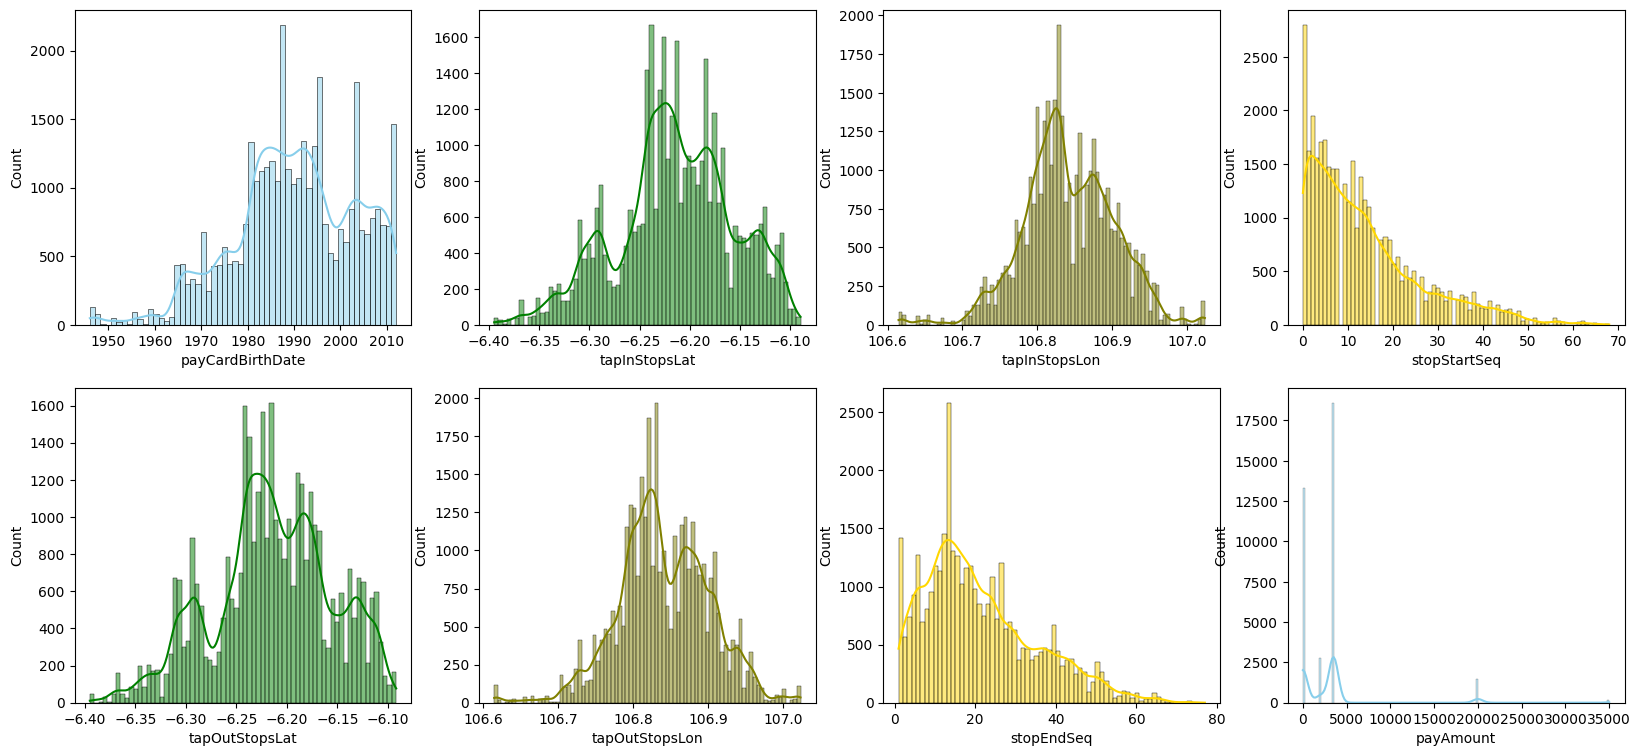

In [55]:
fig, axs = plt.subplots(2, 4, figsize=(20, 9))
sns.histplot(data = df2['payCardBirthDate'], kde = True, color="skyblue", ax=axs[0, 0])
sns.histplot(data = df2['tapInStopsLat'], kde = True, color="green", ax=axs[0, 1])
sns.histplot(data = df2['tapInStopsLon'], kde = True, color="olive", ax=axs[0, 2])
sns.histplot(data = df2['stopStartSeq'], kde = True, color="gold", ax=axs[0, 3])
sns.histplot(data = df2['tapOutStopsLat'], kde = True, color="green", ax=axs[1, 0])
sns.histplot(data = df2['tapOutStopsLon'], kde = True, color="olive", ax=axs[1, 1])
sns.histplot(data = df2['stopEndSeq'], kde = True, color="gold", ax=axs[1, 2])
sns.histplot(data = df2['payAmount'], kde = True, color="skyblue", ax=axs[1, 3])


plt.show()

Berdasarkan hasil visualisasi, dapat disimpulkan bahwa data tidak berdistribusi normal. Namun, untuk memperoleh hasil yang lebih pasti digunakan uji Kolmogorov-Smirnov. Hal ini karena jumlah data yang digunakan dalam analisis besar.

In [56]:
for i in df2.select_dtypes(include='number').columns:
    stats, p_val = kstest(df2[i], 'norm')
    if p_val >= 0.05:
        print(f"{i} berdistribusi normal (p-value = {p_val:.3f})")
    else:
        print(f"{i} tidak berdistribusi normal (p-value = {p_val:.3f})")

payCardBirthDate tidak berdistribusi normal (p-value = 0.000)
tapInStopsLat tidak berdistribusi normal (p-value = 0.000)
tapInStopsLon tidak berdistribusi normal (p-value = 0.000)
stopStartSeq tidak berdistribusi normal (p-value = 0.000)
tapOutStopsLat tidak berdistribusi normal (p-value = 0.000)
tapOutStopsLon tidak berdistribusi normal (p-value = 0.000)
stopEndSeq tidak berdistribusi normal (p-value = 0.000)
payAmount tidak berdistribusi normal (p-value = 0.000)


##### **4.4.3 Korelasi**

Berdasarkan hasil visualisasi dan uji normalitas Kolmogorov-Smirnov, dapat diketahui bahwa data tidak berdistribusi normal. Oleh karena itu, digunakan uji korelasi spearman.

In [57]:
df_corr = df2.select_dtypes(include='number').corr(method="spearman")
df_corr

,payCardBirthDate,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
payCardBirthDate,1.000000,0.053727,-0.051977,-0.025353,0.033972,-0.043361,-0.024056,0.076681
tapInStopsLat,0.053727,1.000000,0.022879,-0.008314,0.910462,0.032922,-0.021052,-0.025201
tapInStopsLon,-0.051977,0.022879,1.000000,0.052205,0.032485,0.914387,0.089401,-0.237121
stopStartSeq,-0.025353,-0.008314,0.052205,1.000000,-0.023913,0.045653,0.791660,-0.388980
tapOutStopsLat,0.033972,0.910462,0.032485,-0.023913,1.000000,0.013738,-0.028110,-0.024537
tapOutStopsLon,-0.043361,0.032922,0.914387,0.045653,0.013738,1.000000,0.081480,-0.229104
stopEndSeq,-0.024056,-0.021052,0.089401,0.791660,-0.028110,0.081480,1.000000,-0.537211
payAmount,0.076681,-0.025201,-0.237121,-0.388980,-0.024537,-0.229104,-0.537211,1.000000


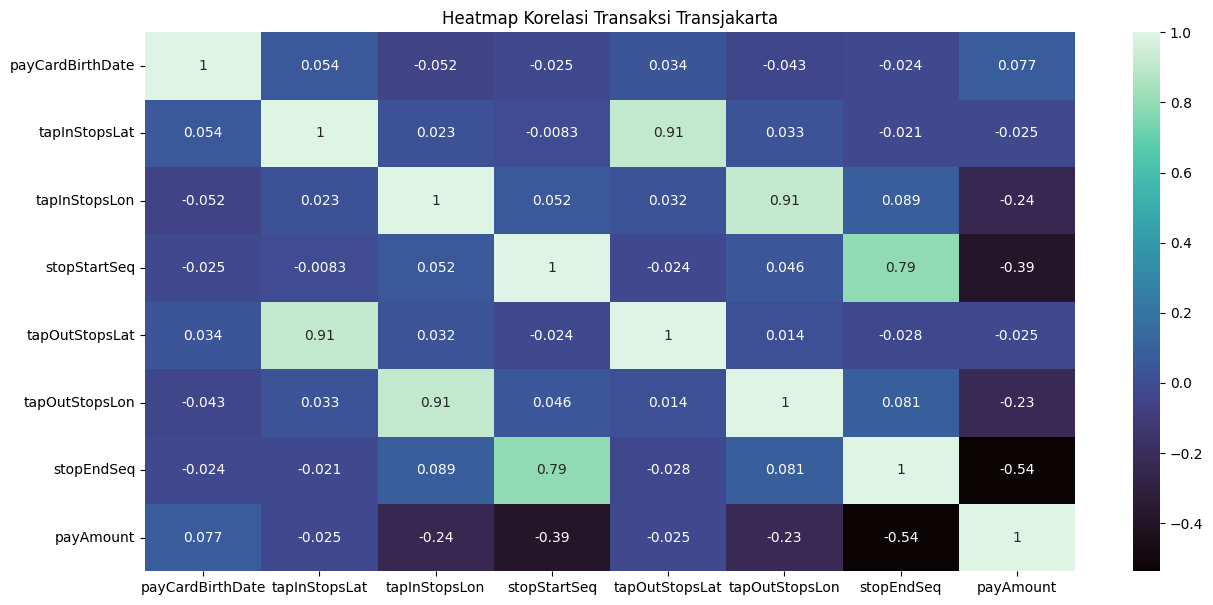

In [58]:
plt.figure(figsize = (15,7))
sns.heatmap(data=df_corr, annot=True, cmap='mako')
plt.title("Heatmap Korelasi Transaksi Transjakarta")
plt.show()

Berdasarkan hasil heatmap dengan menggunakan korelasi spearman, dapat diketahui:
-  Variabel tapInStopsLat memiliki korelasi yang kuat, yaitu sebesar 0.91 dengan variabel tapOutStopsLat
- Variabel tapInStopsLon memiliki korelasi yang kuat dengan variabel tapOutStopsLon, yaitu sebesar 0.91.
- Variabel stopStartSeq memiliki korelasi yang cukup kuat dengan variabel stopEndSeq karena memiliki korelasi sebesar 0.79.

>  **KESIMPULAN DATA CLEANING**
- Setelah dilakukan *cleaning* pada data, dapat diketahui bahwa jumlah baris berkurang sebanyak 1553 baris. Sebelumnya, data terdiri dari 37900 baris menjadi 36347 baris.
- Selain itu, dilakukan konversi atau perubahan tipe data:
    + Variabel payCardBirthDate sebelumnya int64 menjadi object
    + Variabel direction sebelumnya float64 menjadi object
    + Variabel tapInTime sebelumnya object menjadi datetime
    + Variabel tapOutTime sebelumnya object menjadi datetime
    + Variabel payCardID sebelumnya int64 menjadi object
    + Variabel stopEndSeq sebelumnya float64 menjadi int64
- Data sudah tidak terdapat *missing value*. Dalam mengatasi *missing value*, dilakukan imputasi nilai dengan memerhatikan variabel lainnya yang memiliki hubungan dan referensi. Namun, jika masih ditemukan *missing value* maka *missing value* tersebut dihapus. *Missing value* tersebut dihapus untuk menghindari representasi yang salah atau menimbulkan bias.
- *Outlier* pada variabel payCardBirthDate, tapInStopsLat, tapOutStopsLat, dan payAmount tidak bisa dihapus. Hal ini karena *outlier* pada keempat variabel tersebut relevan atau valid.
- Berdasarkan hasil uji korelasi spearman dapat diketahui terdapat variabel yang memiliki hubungan atau korelasi yang kuat, yaitu variabel tapInStopsLat dengan variabel tapOutStopsLat, variabel tapInStopsLon dengan variabel tapOutStopsLon, dan variabel stopStartSeq dengan variabel stopEndSeq.

### **5. Visualisasi Data**

#### **5.1 Analisis Rute dan Jumlah Penumpang**

##### **5.1.1 Rute/Koridor Populer (Paling Banyak Digunakan) & Tidak Populer (Kurang Digunakan)**

In [60]:
corridor = "[" + df2["corridorID"] + "] " + df2['corridorName']
top10_popularity_corridor= corridor.value_counts().head(10).reset_index()
top10_popularity_corridor.rename(columns={'index': 'corridor'}, inplace=True)
top10_popularity_corridor

,corridor,count
0,[1T] Cibubur - Balai Kota,389
1,[S21] Ciputat - CSW,383
2,[JIS3] Harmoni - Jakarta International Stadium,341
3,[JAK.06] Kampung Rambutan - Pondok Gede,335
4,[11P] Rusun Pondok Bambu - Walikota Jakarta Timur,333
5,[8C] Kebayoran Lama - Tanah Abang,329
6,[2E] Rusun Rawa Bebek - Kodamar,312
7,[9D] Pasar Minggu - Tanah Abang,308
8,[M7B] BKN - Blok M,307
9,[6N] Ragunan - Blok M via Kemang,299


C:\Users\ERGIDYA LIVIANI\AppData\Local\Temp\ipykernel_11468\3022315714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(top10_popularity_corridor, x="count", y="corridor", palette="crest", errorbar=None)


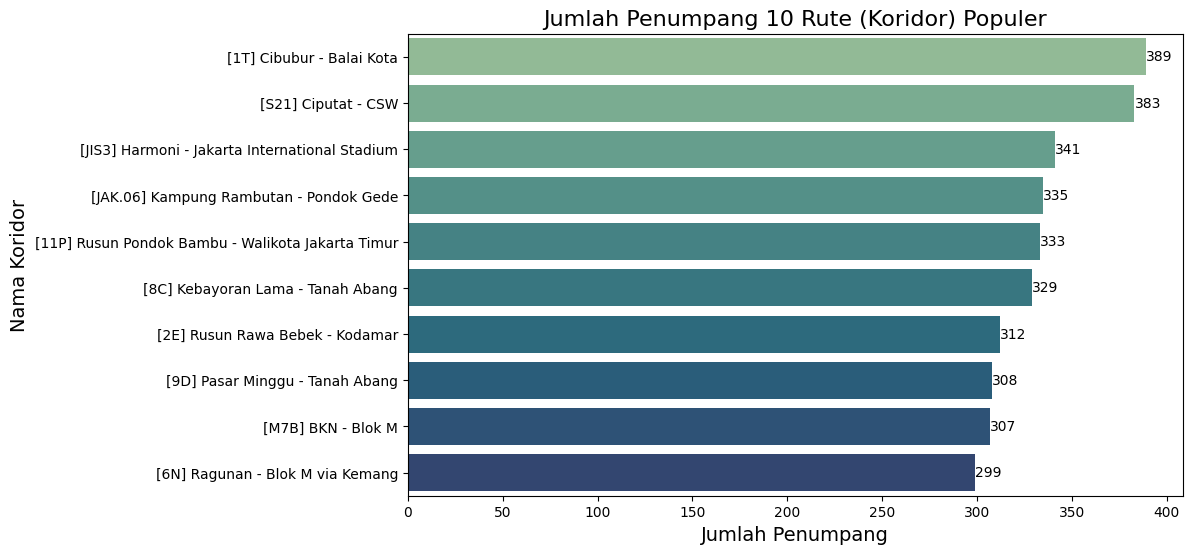

In [61]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(top10_popularity_corridor, x="count", y="corridor", palette="crest", errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Jumlah Penumpang 10 Rute (Koridor) Populer', fontsize=16)
plt.xlabel('Jumlah Penumpang', fontsize=14)
plt.ylabel('Nama Koridor', fontsize=14)
plt.show()

In [62]:
unpopular_corridor = corridor.value_counts().reset_index()
min_count_corridor = unpopular_corridor['count'].min()
unpopular_corridor= unpopular_corridor[unpopular_corridor['count'] == min_count_corridor]
unpopular_corridor

,index,count
220,[7B] Kampung Rambutan - Blok M,16


In [63]:
bottom10_unpopularity_corridor= corridor.value_counts().tail(10).reset_index()
bottom10_unpopularity_corridor.rename(columns={'index': 'corridor'}, inplace=True)
bottom10_unpopularity_corridor

,corridor,count
0,[11C] Rusun Pinus Elok - Rusun Pulo Gebang,54
1,[12P] St. LRT Pegangsaan Dua - JIS,52
2,[7P] Pondok Kelapa - BKN,49
3,[2Q] Gondangdia - Balai Kota,39
4,[JAK.53] Grogol - Pos Pengumben via Slipi,38
5,[1R] Senen - Tanah Abang,38
6,[JAK.99] Term. Pulo Gadung - Lampiri,30
7,[JAK.12] Tanah Abang - Kebayoran Lama via Pos ...,22
8,[M5] Matraman Baru - Ancol,17
9,[7B] Kampung Rambutan - Blok M,16


C:\Users\ERGIDYA LIVIANI\AppData\Local\Temp\ipykernel_11468\1607337520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(bottom10_unpopularity_corridor.sort_values(by='count', ascending=True), x="count", y="corridor", palette="crest", errorbar=None)


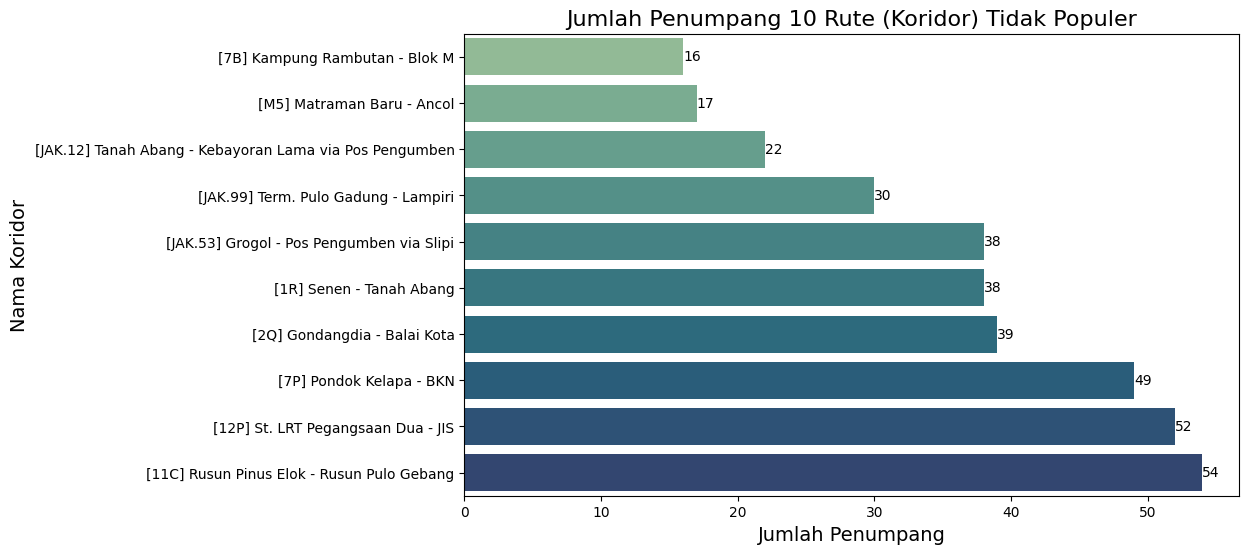

In [65]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(bottom10_unpopularity_corridor.sort_values(by='count', ascending=True), x="count", y="corridor", palette="crest", errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Jumlah Penumpang 10 Rute (Koridor) Tidak Populer', fontsize=16)
plt.xlabel('Jumlah Penumpang', fontsize=14)
plt.ylabel('Nama Koridor', fontsize=14)
plt.show()

Berdasarkan hasil visualisasi dan analisis yang diperoleh, dapat diketahui rute atau koridor [1T] Cibubur-Balai Kota adalah koridor yang paling populer atau paling banyak digunakan dan [7B] Kampung Rambutan - Blok M adalah rute yang paling jarang digunakan.

##### **5.1.2 Pergerakan Penumpang dari Halte Tempat Tap In Hingga Halte Tempat Tap Out**

In [60]:
halte_in_and_out = df2[['tapInStopsName', 'tapOutStopsName']].value_counts().head(10).reset_index()
halte_in_and_out

,tapInStopsName,tapOutStopsName,count
0,Rusun Kapuk Muara,Penjaringan,125
1,Penjaringan,Rusun Kapuk Muara,116
2,Garuda Taman Mini,BKN,100
3,Cibubur Junction,BKN,87
4,Garuda Taman Mini,Pinang Ranti,84
5,Tanah Merdeka Arah Timur,Kampung Rambutan,84
6,Simpang Danau Sunter Utara Barat,Jembatan Item,78
7,Rusun Penjaringan,Penjaringan,69
8,Penjaringan,Rusun Penjaringan,68
9,Penggilingan,Rusun Komarudin,67


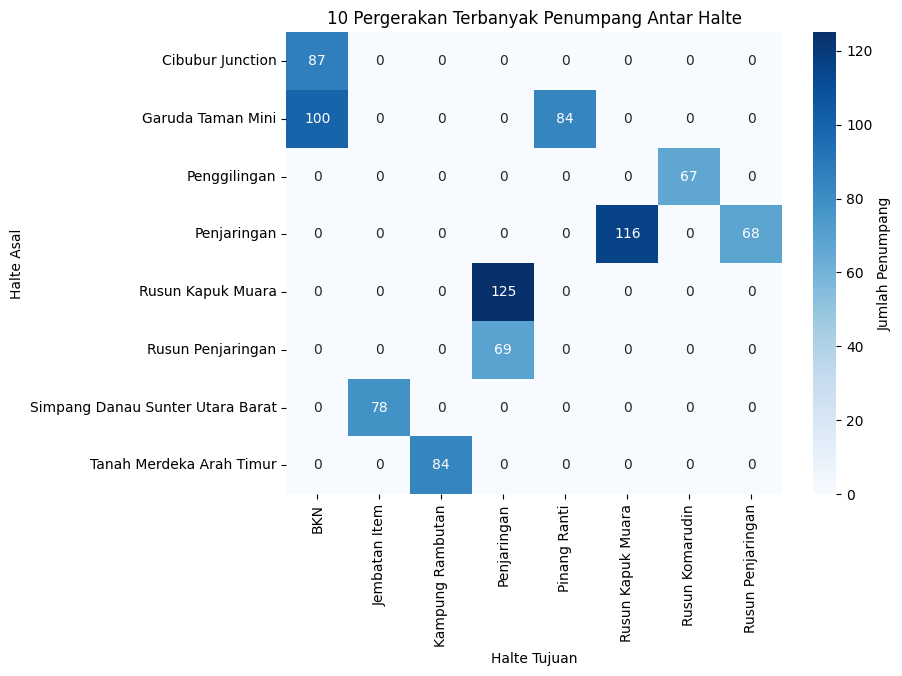

In [61]:
od_matrix = halte_in_and_out.pivot(index="tapInStopsName", columns="tapOutStopsName", values="count").fillna(0)

# Buat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(od_matrix, annot=True, fmt="g", cmap="Blues", cbar_kws={'label': 'Jumlah Penumpang'})
plt.title("10 Pergerakan Terbanyak Penumpang Antar Halte")
plt.xlabel("Halte Tujuan")
plt.ylabel("Halte Asal")
plt.show()

In [62]:
all_stop = df2['tapInStopsName'].tolist() +df2['tapOutStopsName'].tolist() 
all_stop = Counter(all_stop)
all_stop

Counter({'Penjaringan': 498,
         'BKN': 478,
         'BNN LRT': 258,
         'Cibubur Junction': 254,
         'Tendean': 253,
         'Rusun Kapuk Muara': 241,
         'Penggilingan': 239,
         'Kejaksaan Agung': 238,
         'Garuda Taman Mini': 234,
         'Pecenongan': 220,
         'Monas': 220,
         'Ragunan': 213,
         'Seskoal': 206,
         'Rawa Barat': 203,
         'Bundaran Senayan 1': 202,
         'Jelambar': 201,
         'Term. Senen': 201,
         'Walikota Jakarta Timur': 194,
         'Cawang UKI': 190,
         'Mayestik': 188,
         'Jak Lingko Tanah Abang': 187,
         'Puri Beta 2': 187,
         'Bundaran Senayan': 186,
         'Term. Kampung Rambutan': 185,
         'Gelora Bung Karno': 181,
         'Pancoran Tugu Arah Barat': 179,
         'Tirtayasa': 176,
         'Jembatan Item': 176,
         'Pinang Ranti': 174,
         'JPO Blok G': 168,
         'Pejaten': 166,
         'Tosari': 159,
         'Adam Malik': 159,
      

In [63]:
df2['tapInStopsName'].value_counts()

tapInStopsName
Penjaringan                      233
Garuda Taman Mini                202
BKN                              163
BNN LRT                          149
Pejaten                          146
                                ... 
Pertamina Term. Priok              1
SMU Balai Rakyat                   1
Pintu Tol Pondok Gede Selatan      1
Mampang 5                          1
Jln. Gunung Galunggung 1           1
Name: count, Length: 2488, dtype: int64

In [64]:
df2['tapOutStopsName'].value_counts()

tapOutStopsName
BKN                         315
Penjaringan                 265
Term. Senen                 196
Monas                       165
Term. Kampung Rambutan      164
                           ... 
Sekolah Lemuel                1
Sbr. Jln. Rasamala Dalam      1
SDN Marunda 01                1
Simpang Tomang Asli Buni      1
RSUD Cengkareng               1
Name: count, Length: 2196, dtype: int64

- Halte Rusun Kapuk Muara sebagai halte asal dan halte Penjaringan sebagai halte tujuan adalah pergerakan terbanyak yang dilakukan oleh penumpang, yaitu sebanyak 125 penumpang.
- Halte Penjaringan sebagai halte asal dan halte Rusun Kapuk Muara sebagai halte tujuan adalah pergerakan terbanyak kedua yang dilakukan oleh penumpang, yaitu sebanyak 116 penumpang.
- Tiga halte yang paling banyak digunakan oleh penumpang adalah halte Penjaringan, BKN, dan BNN LRT.
- Halte Penjaringan adalah halte yang paling banyak digunakan oleh penumpang untuk tap in (masuk) dan terbanyak kedua untuk tap out (keluar).
- Halte BKN adalah halte yang paling banyak yang digunakan oleh penumpang untuk tap out (keluar).
- Halte Garuda Taman Mini adalah halte tempat penumpang terbanyak kedua untuk tap in (masuk).

##### **5.1.3 Jumlah Penumpang per Jam dan Hari**

In [65]:
df2['tapInHour'] = df2['tapInTime'].dt.hour
df2['day'] = df2['tapInTime'].dt.day_name()
df2['tapOutHour'] = df2['tapOutTime'].dt.hour

df2.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,day,tapOutHour
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pulang,P00142,...,P00253,Tegalan,-6.203101,106.85715,12,2023-04-03 06:00:53,2000.0,5,Monday,6
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Keberangkatan,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21,2023-04-03 06:40:01,2000.0,5,Monday,6
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Keberangkatan,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39,2023-04-03 06:50:55,2000.0,5,Monday,6
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Keberangkatan,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29,2023-04-03 06:28:16,2000.0,5,Monday,6
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Keberangkatan,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15,2023-04-03 06:57:03,2000.0,6,Monday,6


In [66]:
tapIn_df = pd.DataFrame({
    'type': 'tapIn',
    'hour': df2['tapInHour']
})

tapOut_df = pd.DataFrame({
    'type': 'tapOut',
    'hour': df2['tapOutHour']
})

hour = pd.concat([tapIn_df, tapOut_df], ignore_index=True)
hour

,type,hour
0,tapIn,5
1,tapIn,5
2,tapIn,5
3,tapIn,5
4,tapIn,6
...,...,...
72689,tapOut,19
72690,tapOut,22
72691,tapOut,13
72692,tapOut,20


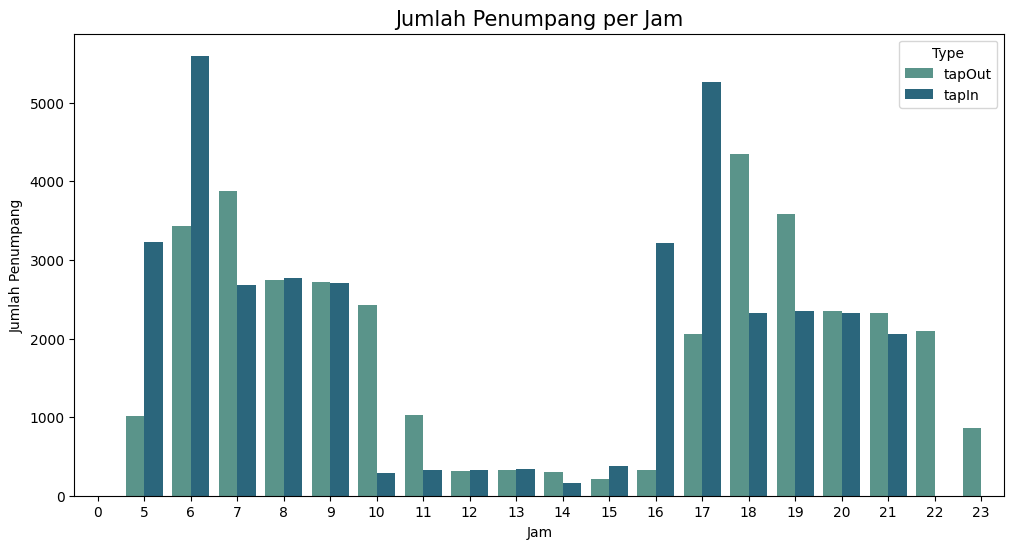

In [67]:
plt.figure(figsize=(12, 6))

sns.countplot(data=hour, x='hour', hue='type', palette='crest')
plt.title('Jumlah Penumpang per Jam', size = 15)
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.legend(title = 'Type')
plt.show()

In [68]:
def busyHour(hour):
    if hour >= 5 and hour <= 9:
        return 'Morning Rush Hour'
    elif hour>=16 and hour<=21:
        return 'Afternoon Rush Hour'
    else:
        return 'Not Rush Hour'

df2['busyHour'] = df2['tapInHour'].apply(busyHour)
df2.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,day,tapOutHour,busyHour
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pulang,P00142,...,Tegalan,-6.203101,106.85715,12,2023-04-03 06:00:53,2000.0,5,Monday,6,Morning Rush Hour
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Keberangkatan,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21,2023-04-03 06:40:01,2000.0,5,Monday,6,Morning Rush Hour
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Keberangkatan,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39,2023-04-03 06:50:55,2000.0,5,Monday,6,Morning Rush Hour
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Keberangkatan,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29,2023-04-03 06:28:16,2000.0,5,Monday,6,Morning Rush Hour
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Keberangkatan,P00239,...,Kali Besar Barat,-6.135355,106.81143,15,2023-04-03 06:57:03,2000.0,6,Monday,6,Morning Rush Hour


In [69]:
# koridor terpadat berdasarkan busyHour
morningTapIn = df2[df2['busyHour']=='Morning Rush Hour'][['corridorID', 'corridorName']].value_counts().reset_index()
morningTapIn

,corridorID,corridorName,count
0,1T,Cibubur - Balai Kota,193
1,S21,Ciputat - CSW,186
2,JAK.06,Kampung Rambutan - Pondok Gede,164
3,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,163
4,JIS3,Harmoni - Jakarta International Stadium,162
...,...,...,...
216,JAK.99,Term. Pulo Gadung - Lampiri,9
217,1R,Senen - Tanah Abang,7
218,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben,7
219,7B,Kampung Rambutan - Blok M,4


In [70]:
afternoonTapIn = df2[df2['busyHour']=='Afternoon Rush Hour'][['corridorID', 'corridorName']].value_counts().reset_index()
afternoonTapIn

,corridorID,corridorName,count
0,1T,Cibubur - Balai Kota,191
1,S21,Ciputat - CSW,182
2,JIS3,Harmoni - Jakarta International Stadium,171
3,JAK.06,Kampung Rambutan - Pondok Gede,165
4,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,165
...,...,...,...
216,2Q,Gondangdia - Balai Kota,13
217,JAK.53,Grogol - Pos Pengumben via Slipi,12
218,7B,Kampung Rambutan - Blok M,8
219,M5,Matraman Baru - Ancol,6


C:\Users\ERGIDYA LIVIANI\AppData\Local\Temp\ipykernel_19724\778031023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(data=df2, y='day', palette='crest')


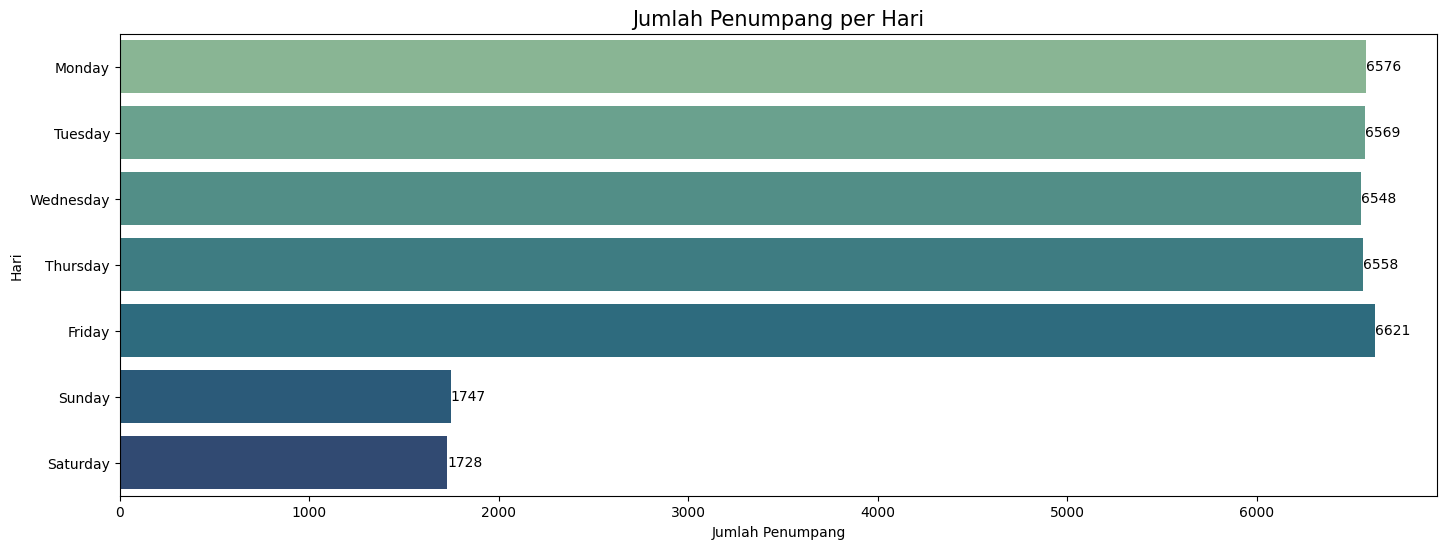

In [71]:
plt.figure(figsize=(17, 6))

ax= sns.countplot(data=df2, y='day', palette='crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Jumlah Penumpang per Hari', size = 15)
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Hari')
plt.show()

- Jumlah penumpang terbanyak adalah pukul 05.00 hingga 09.00 dan pukul 16.00 hingga 21.00
- Rute atau koridor terpadat pukul 05.00 hingga 09.00 dan 16.00 hingga 21.00 adalah [1T] Cibubur - Balai Kota
- Rute atau koridor terpadat kedua pukul 05.00 hingga 09.00 dan 16.00 hingga 21.00 adalah [S21] Ciputat - CSW
- Jumlah penumpang terbanyak adalah saat hari kerja (Monday - Friday)

##### **5.1.4 Perbedaan Jumlah Penumpang pada Arah Keberangkatan dan Pulang**

In [72]:
direction = df2['direction'].value_counts().reset_index()
direction

,direction,count
0,Pulang,18181
1,Keberangkatan,18166


C:\Users\ERGIDYA LIVIANI\AppData\Local\Temp\ipykernel_19724\1600991247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(direction, x="direction", y="count",errorbar=None, palette='crest')


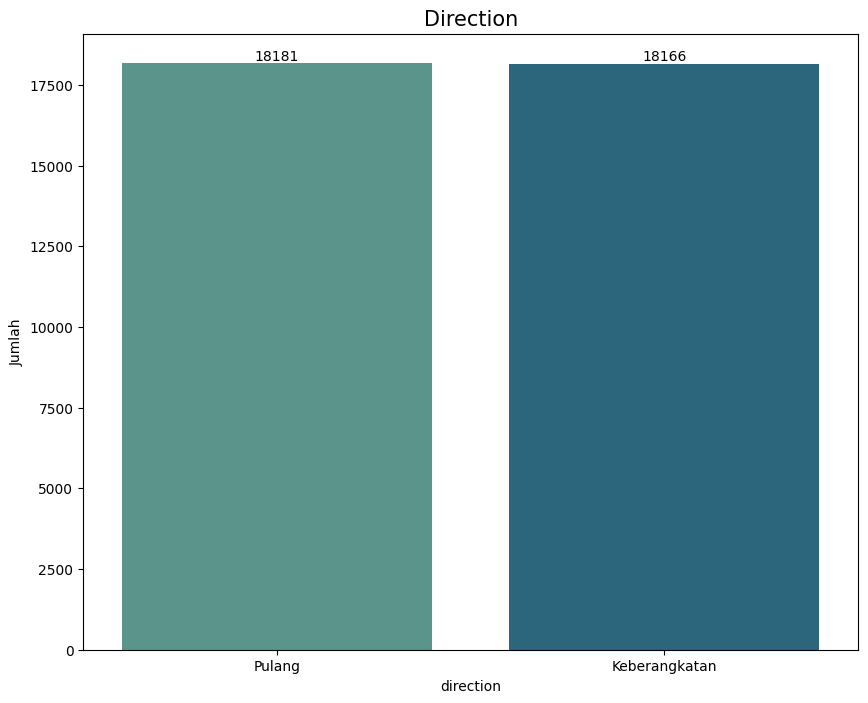

In [73]:
plt.figure(figsize=(10,8))
ax = sns.barplot(direction, x="direction", y="count",errorbar=None, palette='crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Direction', size = 15)
plt.ylabel('Jumlah')
plt.show()

In [74]:
corridor_direction = df2[["direction", "corridorName"]].value_counts().reset_index().head(10)
corridor_direction

,direction,corridorName,count
0,Pulang,Cibubur - Balai Kota,197
1,Keberangkatan,Cibubur - Balai Kota,192
2,Pulang,Ciputat - CSW,192
3,Keberangkatan,Ciputat - CSW,191
4,Pulang,Harmoni - Jakarta International Stadium,174
5,Pulang,Kalideres - Bundaran HI via Veteran,172
6,Pulang,Pulo Gadung - Monas,169
7,Keberangkatan,Rusun Pondok Bambu - Walikota Jakarta Timur,169
8,Pulang,Kampung Rambutan - Pondok Gede,168
9,Keberangkatan,Kampung Rambutan - Pondok Gede,167


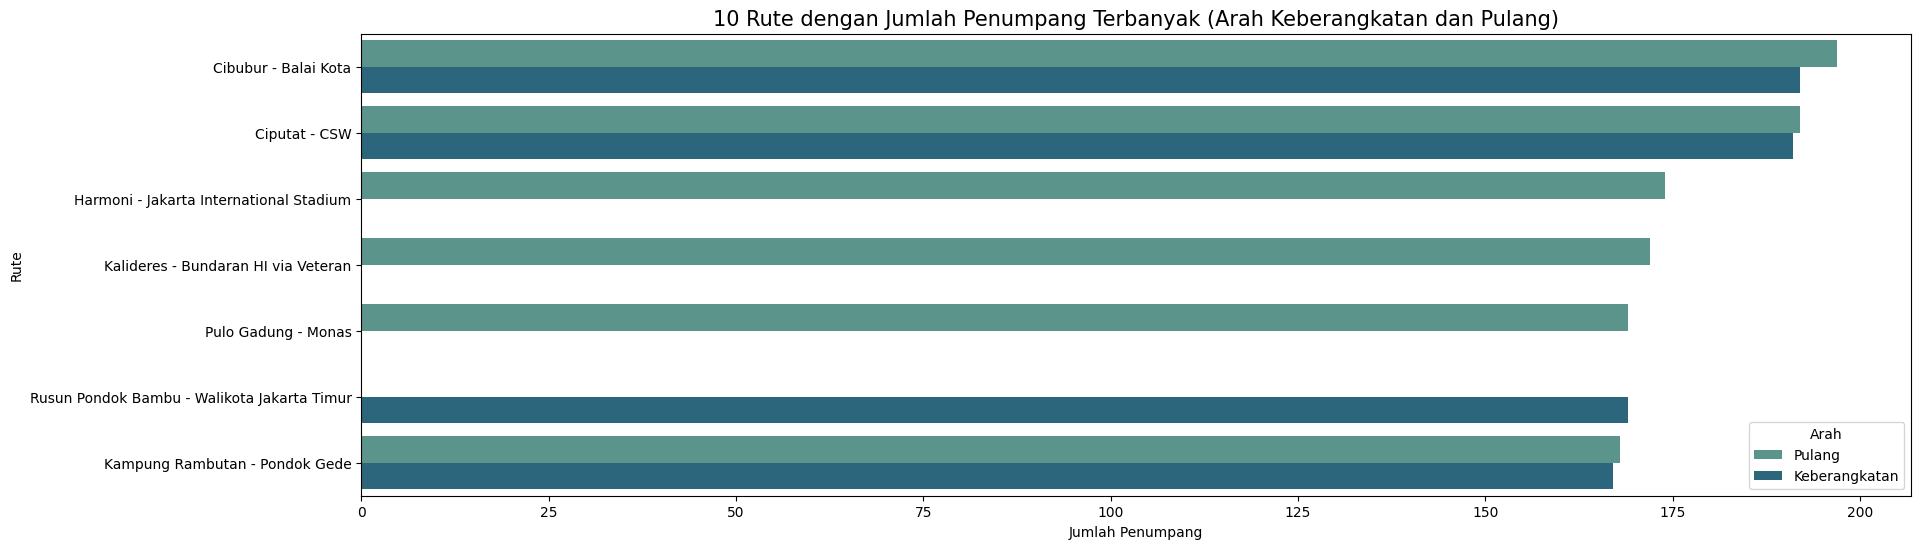

In [75]:
plt.figure(figsize=(20, 6))
sns.barplot(data=corridor_direction, x="count", y="corridorName", hue="direction", palette='crest')
plt.title("10 Rute dengan Jumlah Penumpang Terbanyak (Arah Keberangkatan dan Pulang)", size=15)
plt.xlabel("Jumlah Penumpang")
plt.ylabel("Rute")
plt.legend(title="Arah")
plt.show()

- Penumpang lebih banyak menggunakan Transjakarta arah rute pulang dibandingkan keberangkatan. 
- Rute Cibubur - Balai Kota	merupakan rute terpadat, baik arah rute pulang maupun keberangkatan. 
- Rute Ciputat - CSW adalah rute terpadat kedua, baik arah rute pulang maupun keberangkatan.

##### **5.1.5 Visualisasi Spasial 15 Pergerakan Penumpang Terbanyak**

In [76]:
map_halte_in_and_out = df2[['tapInStopsName', 'tapOutStopsName','tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon']].value_counts().head(20).reset_index()
map_halte_in_and_out

,tapInStopsName,tapOutStopsName,tapInStopsLat,tapInStopsLon,tapOutStopsLat,tapOutStopsLon,count
0,Rusun Kapuk Muara,Penjaringan,-6.135667,106.76299,-6.126306,106.792030,125
1,Penjaringan,Rusun Kapuk Muara,-6.126306,106.79203,-6.135667,106.762990,116
2,Garuda Taman Mini,BKN,-6.290154,106.88116,-6.257751,106.870000,100
3,Cibubur Junction,BKN,-6.368735,106.89366,-6.257751,106.870000,87
4,Garuda Taman Mini,Pinang Ranti,-6.290154,106.88116,-6.291075,106.886340,84
5,Tanah Merdeka Arah Timur,Kampung Rambutan,-6.307866,106.87389,-6.309885,106.882160,84
6,Simpang Danau Sunter Utara Barat,Jembatan Item,-6.139853,106.85663,-6.130078,106.854920,78
7,Rusun Penjaringan,Penjaringan,-6.130702,106.79487,-6.126306,106.792030,69
8,Penjaringan,Rusun Penjaringan,-6.126306,106.79203,-6.130702,106.794870,68
9,Penggilingan,Rusun Komarudin,-6.214132,106.93961,-6.208781,106.942520,67


In [77]:
m = folium.Map(location=[-6.2, 106.8], zoom_start=12)

# Menambahkan titik tap-in
for idx, row in map_halte_in_and_out.iterrows():
    folium.CircleMarker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup='Tap-In Location'
    ).add_to(m)

# Menambahkan titik tap-out
for idx, row in map_halte_in_and_out.iterrows():
    folium.CircleMarker(
        location=[row['tapOutStopsLat'], row['tapOutStopsLon']],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=0.7,
        popup='Tap-Out Location'
    ).add_to(m)

# Menambahkan garis antar tap-in dan tap-out
for idx, row in map_halte_in_and_out.iterrows():
    folium.PolyLine(
        locations=[
            [row['tapInStopsLat'], row['tapInStopsLon']],
            [row['tapOutStopsLat'], row['tapOutStopsLon']]
        ],
        color='green',
        weight=2
    ).add_to(m)

m

#### **5.2 Waktu Tempuh dan Efisiensi**

##### **5.2.1 Waktu Tempuh Antar Koridor dan Antar Halte**

In [78]:
df2['travelTimeMinutes'] = (df2['tapOutTime'] - df2['tapInTime']).dt.total_seconds() / 60
df2.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,day,tapOutHour,busyHour,travelTimeMinutes
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pulang,P00142,...,-6.203101,106.85715,12,2023-04-03 06:00:53,2000.0,5,Monday,6,Morning Rush Hour,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Keberangkatan,B01963P,...,-6.217152,106.81892,21,2023-04-03 06:40:01,2000.0,5,Monday,6,Morning Rush Hour,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Keberangkatan,B00499P,...,-6.133731,106.81475,39,2023-04-03 06:50:55,2000.0,5,Monday,6,Morning Rush Hour,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Keberangkatan,B05587P,...,-6.183068,106.93194,29,2023-04-03 06:28:16,2000.0,5,Monday,6,Morning Rush Hour,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Keberangkatan,P00239,...,-6.135355,106.81143,15,2023-04-03 06:57:03,2000.0,6,Monday,6,Morning Rush Hour,39.466667


In [79]:
travel_time = df2.groupby('corridorName')['travelTimeMinutes'].mean().round(0).reset_index()
travel_time = travel_time.sort_values(by= 'travelTimeMinutes',ascending=False).head(10)
travel_time

,corridorName,travelTimeMinutes
67,Kampung Rambutan - Blok M,84.0
32,Cinere - Kuningan,83.0
177,Stasiun Palmerah - Tosari,81.0
139,Rawamangun - Klender,81.0
192,Tanah Abang - Kebayoran Lama via Pos Pengumben,80.0
106,Pinang Ranti - Bundaran Senayan,80.0
130,Puri Kembangan - Sentraland Cengkareng,80.0
171,Senen - Pulo Gadung via Kelapa Gading,80.0
156,Rusun Pinus Elok - Rusun Pulo Gebang,80.0
185,TU Gas - Bundaran Senayan,79.0


In [80]:
df2['travelTimeMinutes'].describe()

count    36347.000000
mean        72.109315
std         28.060642
min         15.000000
25%         51.133333
50%         71.816667
75%         95.750000
max        179.050000
Name: travelTimeMinutes, dtype: float64

C:\Users\ERGIDYA LIVIANI\AppData\Local\Temp\ipykernel_19724\3043466556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(travel_time, x="travelTimeMinutes", y="corridorName", palette="crest", errorbar=None)


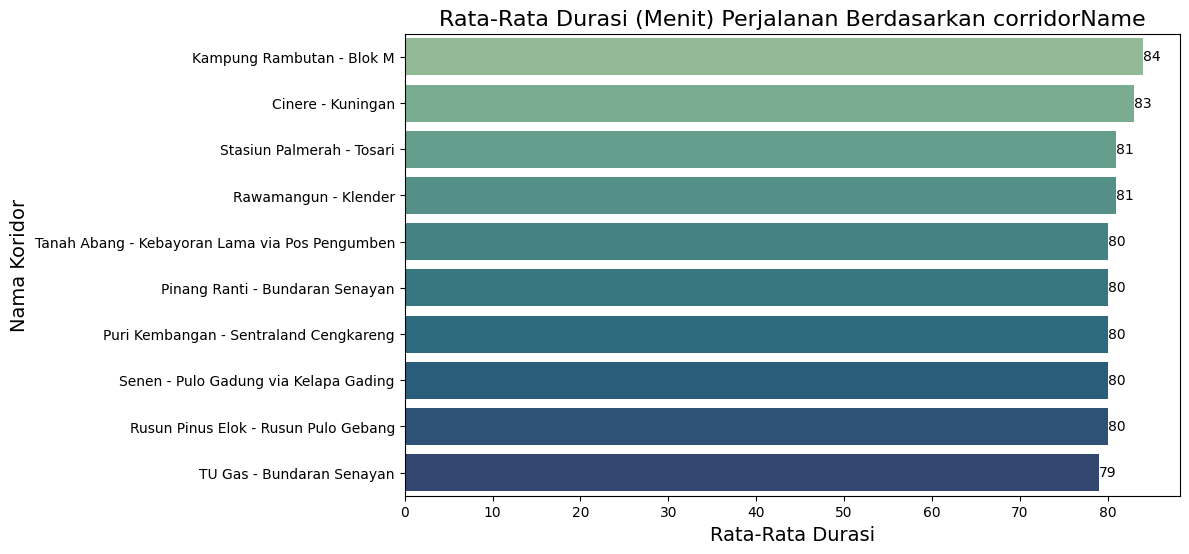

In [81]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(travel_time, x="travelTimeMinutes", y="corridorName", palette="crest", errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Rata-Rata Durasi (Menit) Perjalanan Berdasarkan corridorName', fontsize=16)
plt.xlabel('Rata-Rata Durasi', fontsize=14)
plt.ylabel('Nama Koridor', fontsize=14)
plt.show()

In [82]:
travel_time_halte = df2.groupby(['tapInStopsName', 'tapOutStopsName'])['travelTimeMinutes'].mean().reset_index()
travel_time_halte = travel_time_halte.sort_values(by= 'travelTimeMinutes',ascending=False)
travel_time_halte

,tapInStopsName,tapOutStopsName,travelTimeMinutes
2037,Mega Cinere,FX Sudirman,179.050000
3241,Sbr. Jln. H. Ung,Jembatan Item,179.050000
2949,SDN Kota Bambu 03,Museum Textile,178.966667
4290,Walikota Jakarta Utara Arah Utara,Enggano,178.800000
1808,Landmark Pluit Auto Plaza,Sbr. Gg. Marlina,178.650000
...,...,...,...
3242,Sbr. Jln. Jaya Wijaya,Simpang Raya Cilincing Sungai Landak,15.166667
2163,Pademangan,Pasar Baru Timur,15.133333
3976,Swadarma,Adam Malik,15.133333
2303,Pemuda Pramuka,Ahmad Yani Bea Cukai,15.116667


- Rute dengan rata-rata durasi perjalanan terlama adalah rute Kampung Rambutan - Blok M, yaitu 84 menit, tetapi tidak tergolong lama karena rata-rata lama perjalanan dari keseluruhan sebesar 72 menit. 
- Perjalanan terlama berdasarkan halte adalah dari halte Mega Cinere menuju halte FX Sudirman dan halte Sbr. Jln. H. Ung menuju halte Jembatan Item. 

##### **5.2.2 Variasi Waktu Tempuh Rute Cibubur - Balai Kota dan Ciputat - CSW (Rute Populer)**

In [83]:
variasiWaktu_cibuburBalaiKota_ciputatCSW = df2[df2['corridorName'].isin(['Cibubur - Balai Kota', 'Ciputat - CSW'])]
variasiWaktu_cibuburBalaiKota_ciputatCSW

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,day,tapOutHour,busyHour,travelTimeMinutes
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,Keberangkatan,B00127P,...,-6.210975,106.82059,6,2023-04-03 05:52:25,20000.0,5,Monday,5,Morning Rush Hour,44.400000
134,ESJQ990H8Q22LV,345711968178505,emoney,Kawaya Oktaviani,M,2009,1T,Cibubur - Balai Kota,Pulang,B00102P,...,-6.214808,106.81847,11,2023-04-03 06:09:57,20000.0,5,Monday,6,Morning Rush Hour,41.766667
208,RGMW432Q3X94EA,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,Keberangkatan,B05904P,...,-6.250330,106.79163,26,2023-04-03 06:57:30,2000.0,6,Monday,6,Morning Rush Hour,53.500000
305,ELVF454E9T40AX,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,Pulang,B00325P,...,-6.216247,106.81676,12,2023-04-03 17:08:45,20000.0,16,Monday,17,Afternoon Rush Hour,53.050000
370,BXVS080I7X46TX,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,Pulang,B05773P,...,-6.205650,106.82250,7,2023-04-03 19:39:59,20000.0,17,Monday,19,Afternoon Rush Hour,105.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37679,RCZV713P0N65YK,213164568637687,emoney,R.M. Legawa Prastuti,F,1968,S21,Ciputat - CSW,Pulang,B00052P,...,-6.308924,106.75601,23,2023-04-02 10:26:47,3500.0,9,Sunday,10,Morning Rush Hour,85.950000
37705,UVUL846G2G99AT,3520704464952524,dki,Hilda Halim,M,1986,S21,Ciputat - CSW,Pulang,B05485P,...,-6.308924,106.75601,23,2023-04-28 14:53:48,3500.0,12,Friday,14,Not Rush Hour,128.433333
37774,APFC849H8C90NI,4360652449891343257,brizzi,"Luhung Rahmawati, M.Ak",F,1995,S21,Ciputat - CSW,Keberangkatan,B05820P,...,-6.262287,106.78855,19,2023-04-16 16:24:03,3500.0,14,Sunday,16,Not Rush Hour,126.233333
37824,TMCQ904W0L70TY,4741860768238,online,"drg. Argono Nainggolan, S.Kom",F,1992,S21,Ciputat - CSW,Pulang,B01094P,...,-6.267231,106.78365,13,2023-04-07 12:12:33,3500.0,9,Friday,12,Morning Rush Hour,167.500000


In [84]:
busyHour_cibuburBalaiKota_ciputatCSW= variasiWaktu_cibuburBalaiKota_ciputatCSW.groupby(['corridorName','busyHour'])['travelTimeMinutes'].mean().reset_index()
busyHour_cibuburBalaiKota_ciputatCSW

,corridorName,busyHour,travelTimeMinutes
0,Cibubur - Balai Kota,Afternoon Rush Hour,83.375305
1,Cibubur - Balai Kota,Morning Rush Hour,61.018566
2,Cibubur - Balai Kota,Not Rush Hour,88.900000
3,Ciputat - CSW,Afternoon Rush Hour,84.612363
4,Ciputat - CSW,Morning Rush Hour,68.066756
5,Ciputat - CSW,Not Rush Hour,73.974444


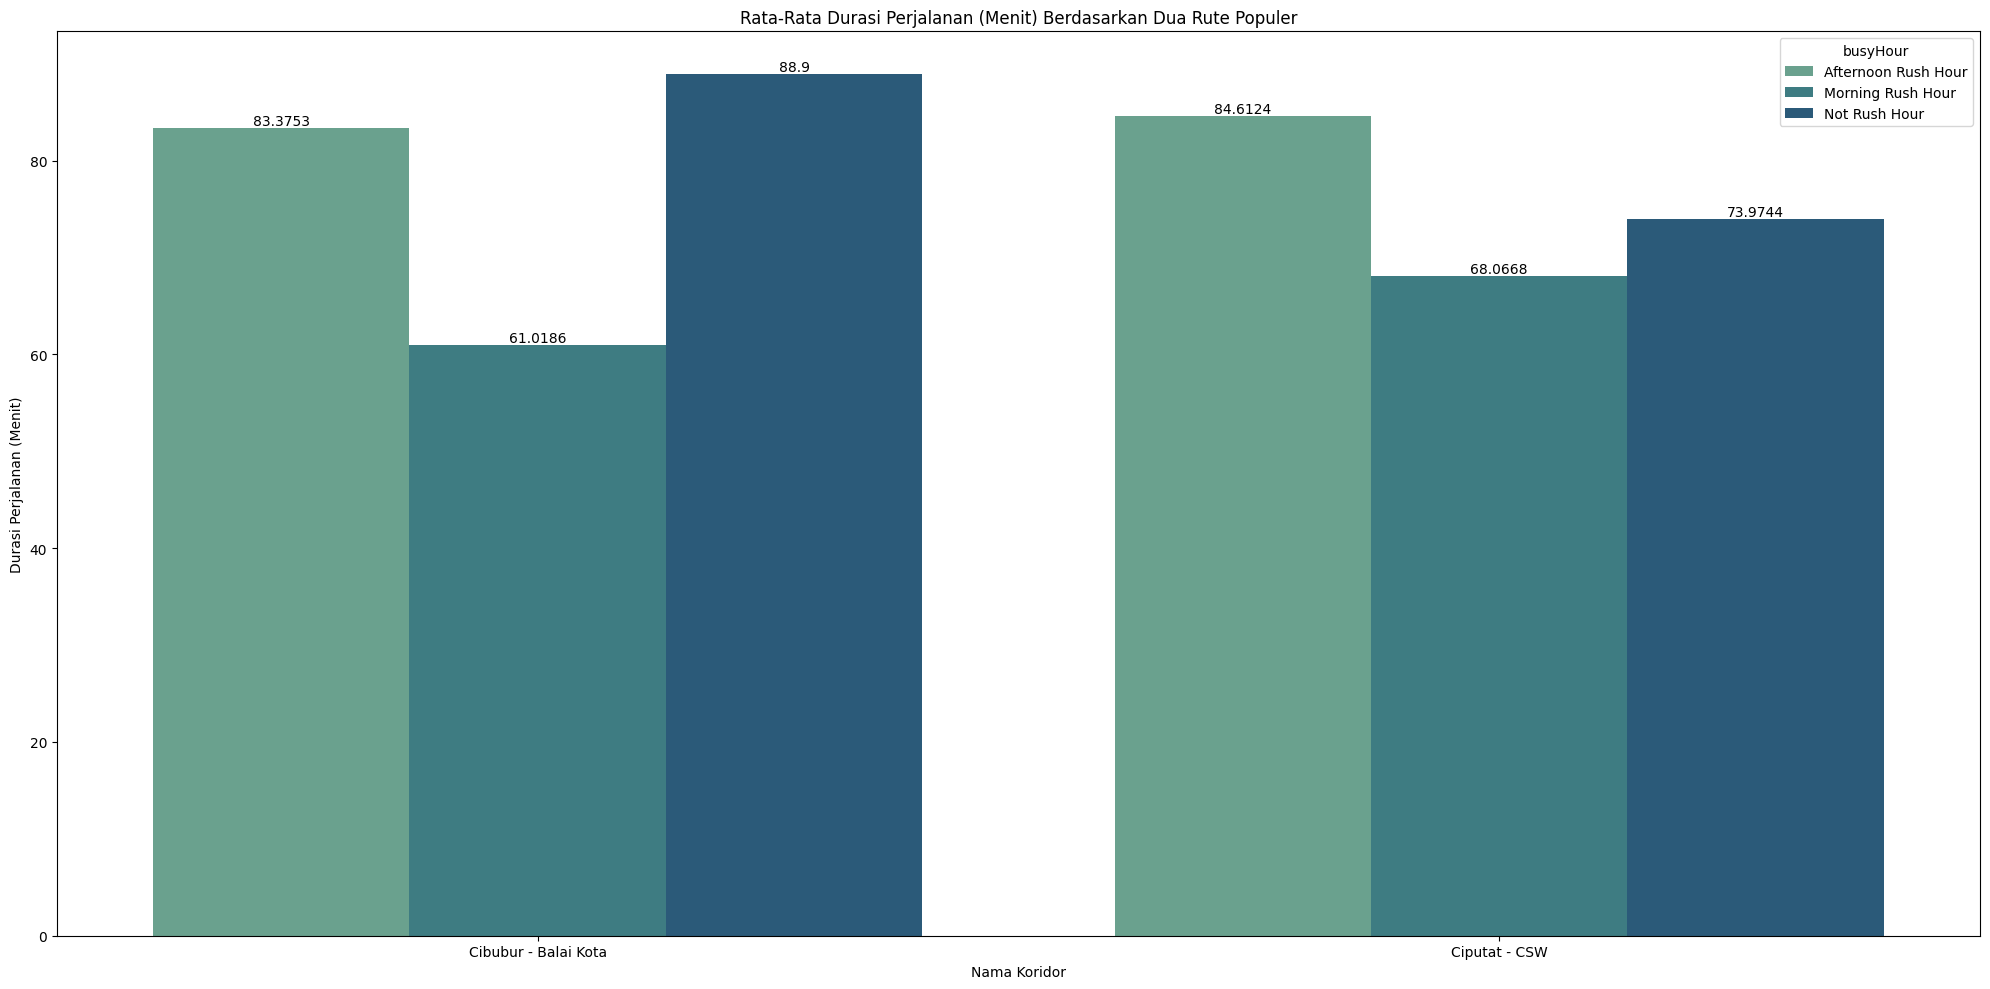

In [85]:
plt.figure(figsize=(20, 10))

ax =sns.barplot(data=busyHour_cibuburBalaiKota_ciputatCSW, x='corridorName', y='travelTimeMinutes', hue='busyHour', palette='crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Rata-Rata Durasi Perjalanan (Menit) Berdasarkan Dua Rute Populer')
plt.xlabel('Nama Koridor')
plt.ylabel('Durasi Perjalanan (Menit)')
plt.tight_layout()
plt.show()

- Rata-rata durasi perjalanan terlama untuk rute Cibubur - Balai Kota adalah bukan saat jam sibuk.
- Rata-rata durasi perjalanan terlama untuk rute Ciputat - CSW adalah saat jam sibuk sore hari.

#### **5.3 Analisis Profil Penumpang**

##### **5.3.1 Berdasarkan Usia**

In [ ]:
year = 2024
df2['age'] = year - df2['payCardBirthDate']
df2.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,day,tapOutHour,busyHour,travelTimeMinutes,age
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pulang,P00142,...,106.85715,12,2023-04-03 06:00:53,2000.0,5,Monday,6,Morning Rush Hour,39.150000,16
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Keberangkatan,B01963P,...,106.81892,21,2023-04-03 06:40:01,2000.0,5,Monday,6,Morning Rush Hour,57.283333,27
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Keberangkatan,B00499P,...,106.81475,39,2023-04-03 06:50:55,2000.0,5,Monday,6,Morning Rush Hour,51.816667,32
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Keberangkatan,B05587P,...,106.93194,29,2023-04-03 06:28:16,2000.0,5,Monday,6,Morning Rush Hour,43.416667,46
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Keberangkatan,P00239,...,106.81143,15,2023-04-03 06:57:03,2000.0,6,Monday,6,Morning Rush Hour,39.466667,42


In [87]:
youngest_age = df2['age'].min()
oldest_age = df2['age'].max()

bins_size = 10
bins = range(youngest_age, oldest_age +bins_size, bins_size)
labels = [f"{b}-{b + bins_size - 1}" for b in bins[:-1]]

df2['age_group'] = pd.cut(df2['age'], bins=bins, labels=labels, right=False)
print(df2['age_group'].unique())
df2.head()

['12-21', '22-31', '32-41', '42-51', '62-71', '52-61', '72-81']
Categories (7, object): ['12-21' < '22-31' < '32-41' < '42-51' < '52-61' < '62-71' < '72-81']


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopEndSeq,tapOutTime,payAmount,tapInHour,day,tapOutHour,busyHour,travelTimeMinutes,age,age_group
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pulang,P00142,...,12,2023-04-03 06:00:53,2000.0,5,Monday,6,Morning Rush Hour,39.150000,16,12-21
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Keberangkatan,B01963P,...,21,2023-04-03 06:40:01,2000.0,5,Monday,6,Morning Rush Hour,57.283333,27,22-31
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Keberangkatan,B00499P,...,39,2023-04-03 06:50:55,2000.0,5,Monday,6,Morning Rush Hour,51.816667,32,32-41
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Keberangkatan,B05587P,...,29,2023-04-03 06:28:16,2000.0,5,Monday,6,Morning Rush Hour,43.416667,46,42-51
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Keberangkatan,P00239,...,15,2023-04-03 06:57:03,2000.0,6,Monday,6,Morning Rush Hour,39.466667,42,42-51


<Figure size 2000x800 with 0 Axes>

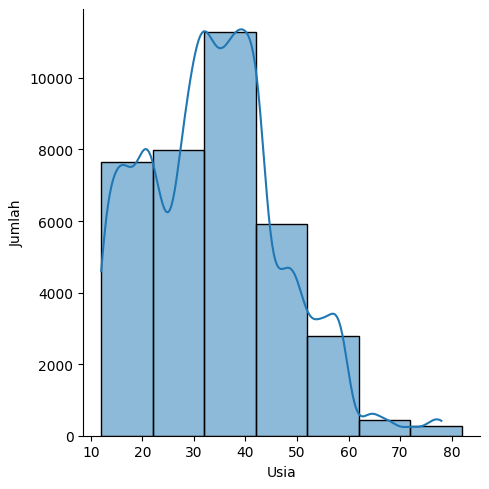

In [88]:
plt.figure(figsize=(20,8))
sns.displot(df2['age'], bins = bins, kde = True)
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

In [89]:
age_group_count = df2['age_group'].value_counts().reset_index()
age_group_count

,age_group,count
0,32-41,11278
1,22-31,7981
2,12-21,7658
3,42-51,5907
4,52-61,2796
5,62-71,442
6,72-81,285


C:\Users\ERGIDYA LIVIANI\AppData\Local\Temp\ipykernel_19724\1987888644.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_count, x='count', y='age_group', errorbar=None, palette='crest')


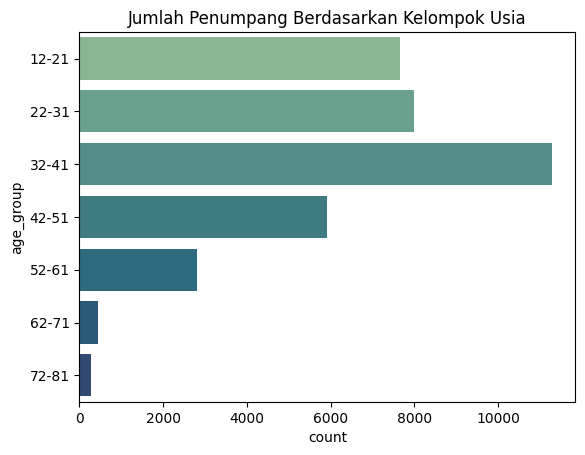

In [90]:
sns.barplot(data=age_group_count, x='count', y='age_group', errorbar=None, palette='crest')
plt.title('Jumlah Penumpang Berdasarkan Kelompok Usia', size=12)
plt.show()

Penumpang yang berusia antara 32-41 tahun adalah penumpang yang paling banyak menggunakan transjakarta.

##### **5.3.2 Berdasarkan Gender**

In [91]:
gender = df2['payCardSex'].value_counts()
gender

payCardSex
F    19359
M    16988
Name: count, dtype: int64

<Axes: title={'center': 'Pie Chart: Jenis Kelamin'}, ylabel='count'>

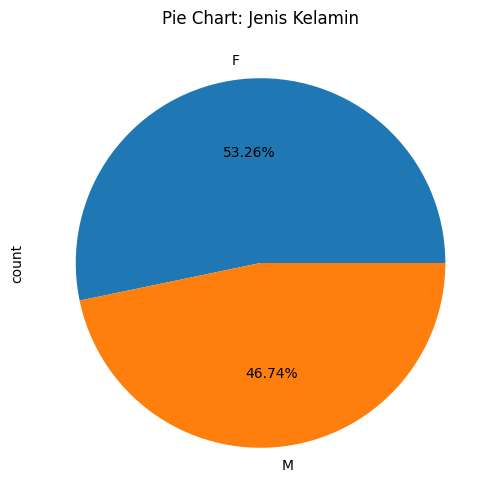

In [92]:
gender.plot.pie(y = 'count',
                    figsize = (8,6),
                     autopct = '%.2f%%',
                     title = 'Pie Chart: Jenis Kelamin',
                     legend = False
                    )

Pengguna transjakarta umumnya adalah penumpang berjenis kelamin perempuan yaitu sebanyak 53.26%.

##### **5.3.3 Berdasarkan Usia dan Gender**

In [93]:
age_gender = df2.groupby(['age_group', 'payCardSex']).size().unstack(fill_value=0)
age_gender

C:\Users\ERGIDYA LIVIANI\AppData\Local\Temp\ipykernel_19724\4259573.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender = df2.groupby(['age_group', 'payCardSex']).size().unstack(fill_value=0)


payCardSex,F,M
age_group,,
12-21,4829,2829
22-31,4906,3075
32-41,6350,4928
42-51,2261,3646
52-61,926,1870
62-71,86,356
72-81,1,284


<Axes: title={'center': 'Jumlah Penumpang Berdasarkan Usia dan Jenis Kelamin'}, xlabel='age_group'>

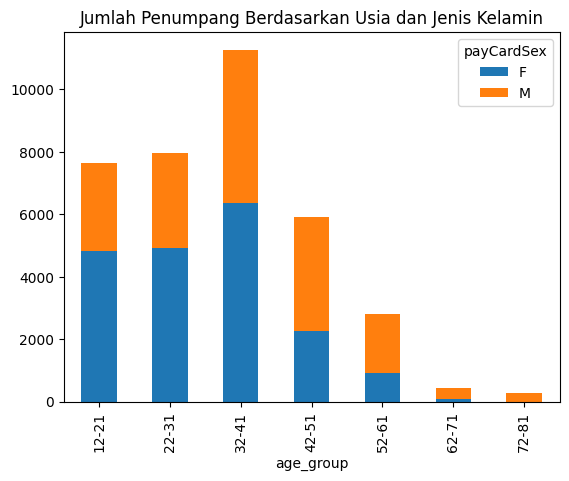

In [94]:
age_gender.plot(kind='bar', title = 'Jumlah Penumpang Berdasarkan Usia dan Jenis Kelamin',stacked=True)

- Penumpang terbanyak adalah penumpang yang berusia 32-41 tahun yang berjenis kelamin perempuan
- Penumpang lansia atau lanjut usia (>60 tahun) terbanyak adalah penumpang yang berjenis kelamin laki-laki. 

##### **5.3.4 Berdasarkan Pengguna Kartu**

In [95]:
card_bank = df2['payCardBank'].value_counts().reset_index()
card_bank

,payCardBank,count
0,dki,17951
1,emoney,6605
2,brizzi,3379
3,flazz,3091
4,online,2751
5,bni,2570


C:\Users\ERGIDYA LIVIANI\AppData\Local\Temp\ipykernel_19724\496427026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(card_bank, x="count", y="payCardBank", palette="crest", errorbar=None)


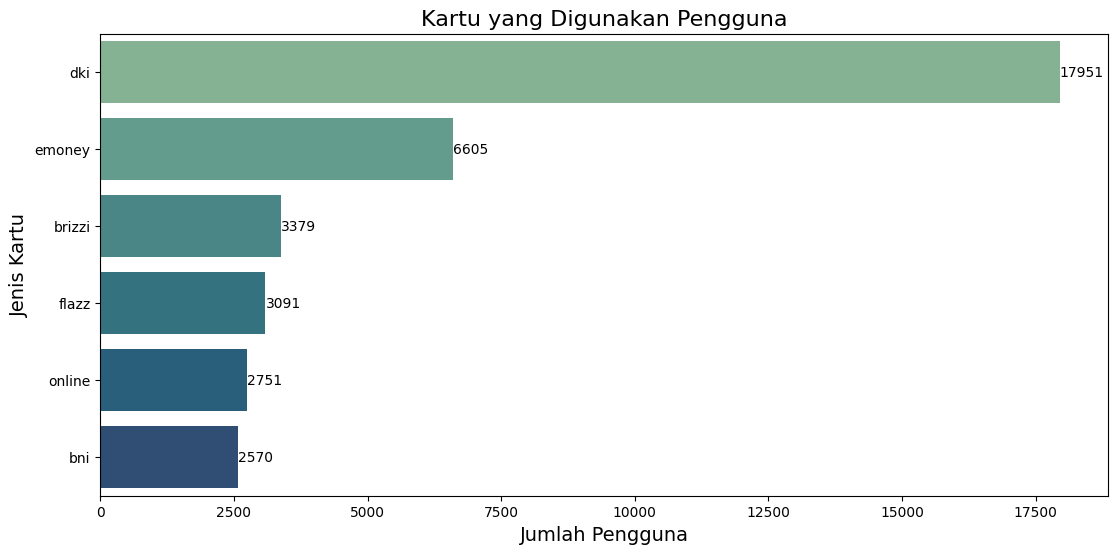

In [96]:
plt.figure(figsize=(13, 6))
ax = sns.barplot(card_bank, x="count", y="payCardBank", palette="crest", errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Kartu yang Digunakan Pengguna', fontsize=16)
plt.xlabel('Jumlah Pengguna', fontsize=14)
plt.ylabel('Jenis Kartu', fontsize=14)
plt.show()

Kartu bank yang paling banyak digunakan adalah kartu DKI, kemudian disusul kartu emoney dan brizzi.

#### **5.4 Analisis Tarif (payAmount)**

In [97]:
payamount_count = df2['payAmount'].value_counts().reset_index()
payamount_count

,payAmount,count
0,3500.0,18599
1,0.0,13312
2,2000.0,2756
3,20000.0,1500
4,35000.0,180


C:\Users\ERGIDYA LIVIANI\AppData\Local\Temp\ipykernel_19724\3479473518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payamount_count, x='payAmount', y='count', errorbar=None, palette='crest')


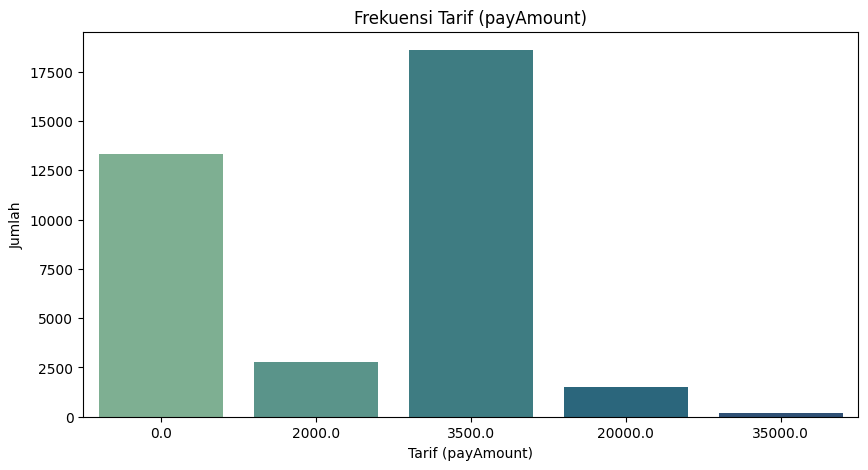

In [98]:
plt.figure(figsize=(10, 5))
sns.barplot(data=payamount_count, x='payAmount', y='count', errorbar=None, palette='crest')
plt.title('Frekuensi Tarif (payAmount)')
plt.xlabel('Tarif (payAmount)')
plt.ylabel('Jumlah')
plt.show()

Penumpang paling banyak terkena tarif Rp3500 dan Rp0 atau gratis. Artinya, penumpang paling banyak menggunakan Transjakarta lebih dari pukul 07.00 dan Mikrotrans atau JakLingko.

### **6. Kesimpulan**

1. Rute Populer dan Halte
    - Koridor [1T] Cibubur-Balai Kota adalah rute paling populer, sementara koridor [7B] Kampung Rambutan-Blok M adalah yang paling jarang digunakan. 
    - Halte Penjaringan menjadi pusat aktivitas terbesar untuk tap in dan tap out, diikuti oleh halte BKN dan BNN LRT.
2. Perilaku Penumpang Berdasarkan Waktu:
    - Jam sibuk utama adalah pagi hari (05.00-09.00) dan sore/malam hari (16.00-21.00), terutama pada hari kerja.
    - Rute Cibubur-Balai Kota dan Ciputat-CSW adalah rute terpadat selama jam sibuk.
3. Durasi Perjalanan:
    - Rute Kampung Rambutan-Blok M memiliki rata-rata perjalanan terlama, meskipun masih dalam batas wajar.
    - Durasi perjalanan terlama untuk rute sibuk seperti Cibubur-Balai Kota terjadi di luar jam sibuk, sedangkan untuk Ciputat-CSW, terjadi saat jam sibuk sore.
4. Demografi Penumpang:
    - Penumpang terbanyak berusia 32-41 tahun, dengan mayoritas berjenis kelamin perempuan (53.26%).
    - Lansia (>60 tahun) cenderung didominasi oleh penumpang laki-laki.
    - Kartu pembayaran yang paling banyak digunakan adalah kartu DKI, diikuti oleh e-Money dan BRI Brizzi.
5. Tarif dan Jenis Kendaraan:
    - Sebagian besar penumpang membayar tarif Rp3.500 atau gratis, yang menunjukkan penggunaan tinggi pada jam setelah pukul 07.00 serta penggunaan layanan Mikrotrans atau JakLingko.

### **7. Rekomendasi**

- Tingkatkan frekuensi bus dan layanan kedua arah perjalanan di koridor [1T] Cibubur-Balai Kota dan [S21] Ciputat-CSW terutama pada jam sibuk (05.00-09.00 dan 16.00-21.00) dan mempertimbangkan penggunaan bus gandeng atau bus articulated untuk menampung lebih banyak penumpang.
- Memperbaiki fasilitas di halte Penjaringan, BKN, dan BNN LRT untuk mendukung tingginya aktivitas penumpang.
- Durasi perjalanan koridor [7B] Kampung Rambutan - Blok M adalah terlama karena rute ini menjangkau area perkantoran dan kawasan strategis di Mampang dan Blok M, serta melewati tempat sentral seperti rumah sakit, kejaksaan Agung, Kalibata City, dan lainnya. Selain itu, terkadang Jalan Tendean macet sehingga dapat menyebabkan lamanya durasi perjalanan rute ini. Namun, rute ini juga merupakan rute yang jarang digunakan. Oleh karena itu, perlu dilakukan evaluasi rute untuk menghindari kemacetan atau menambahkan rute express yang melewati titik strategis tanpa berhenti di halte yang kurang sibuk, serta meningkatkan fasilitas di halte untuk meningkatkan daya tarik penumpang dan melakukan survei untuk memahami kebutuhan penumpang, seperti tujuan utama dan kendala yang dihadapi. <a href= "https://megapolitan.kompas.com/read/2022/12/18/14000081/rute-transjakarta-7b-kampung-rambutan-blok-m">**(Link Sumber)**</a> 
- Menyediakan aksesibilitas yang lebih baik bagi lansia, seperti memperbanyak kursi prioritas dan informasi yang mudah diakses.
- Meningkatkan integrasi dengan transportasi lain, seperti KRL, MRT, dan Mikrotrans/ JakLingko, terutama di halte transit yang sibuk. 
- Memberikan informasi yang jelas dan real-time mengenai jadwal, rute, dan kondisi kepadatan bus kepada penumpang melalui aplikasi, papan informasi di halte, dan media sosial.